# Importing dataset and necessary libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler



In [109]:
# loading the dataset
data = pd.read_csv('EasyVisa.csv')

# Data overview

In [110]:
# printing first 5 rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [111]:
# printing last 5 rows of the dataset
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [113]:
# dropping the case_id column
data = data.drop('case_id',axis=1)

In [114]:
# checking for any null value
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [115]:
# checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [116]:
# checking shape of the dataset
data.shape

(25480, 11)

In [117]:
list_obj = data.select_dtypes(include='object').columns
list_obj

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [118]:
for obj in list_obj:
    print(obj)
    print(data[obj].unique())
    print()

continent
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']

education_of_employee
['High School' "Master's" "Bachelor's" 'Doctorate']

has_job_experience
['N' 'Y']

requires_job_training
['N' 'Y']

region_of_employment
['West' 'Northeast' 'South' 'Midwest' 'Island']

unit_of_wage
['Hour' 'Year' 'Week' 'Month']

full_time_position
['Y' 'N']

case_status
['Denied' 'Certified']



In [119]:
for obj in list_obj:
    print(obj)
    print(data[obj].value_counts())
    print()

continent
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

education_of_employee
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

has_job_experience
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

requires_job_training
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

region_of_employment
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

unit_of_wage
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

full_time_position
full_time_position
Y    22773
N     2707
Name: count, dtype: int64

case_status
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64



# Univariate analysis

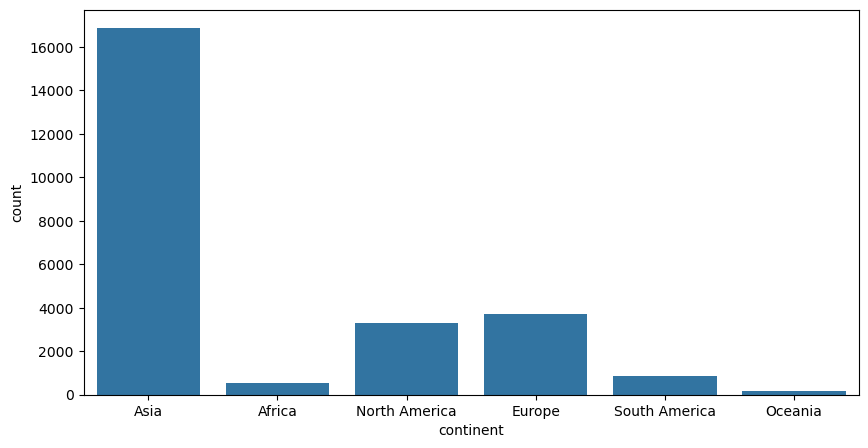

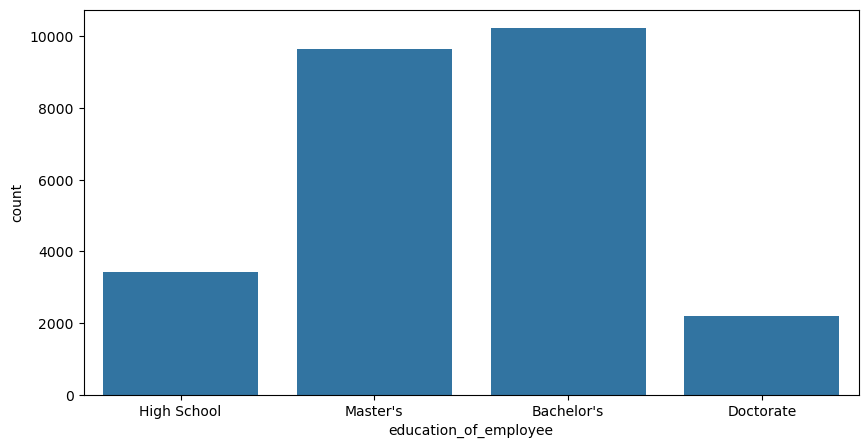

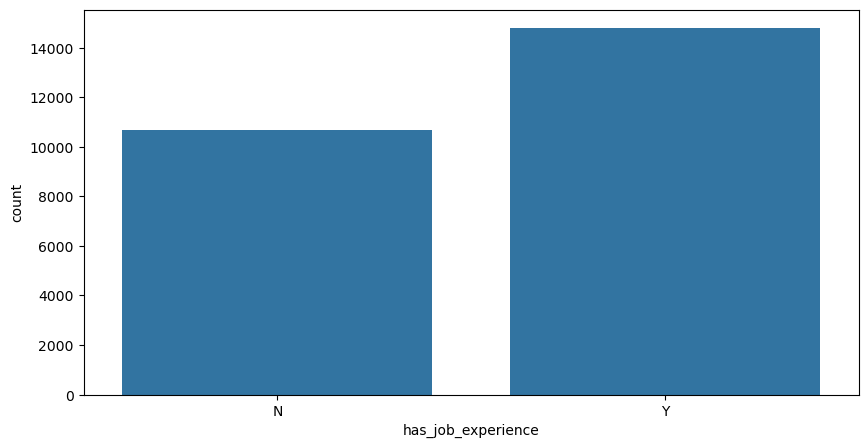

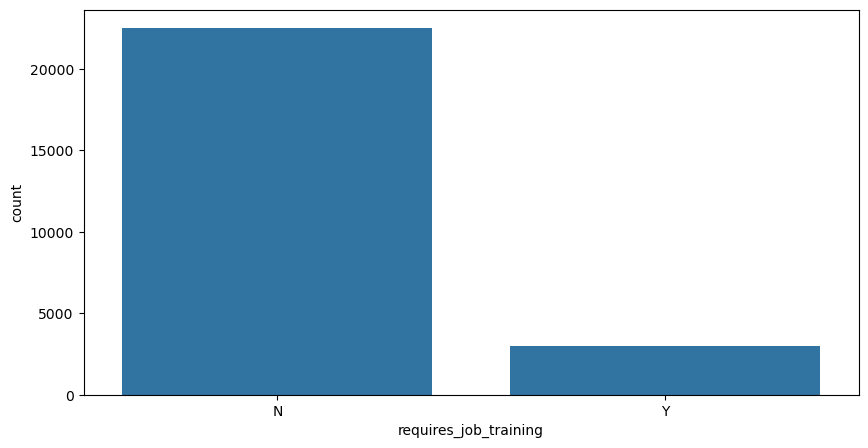

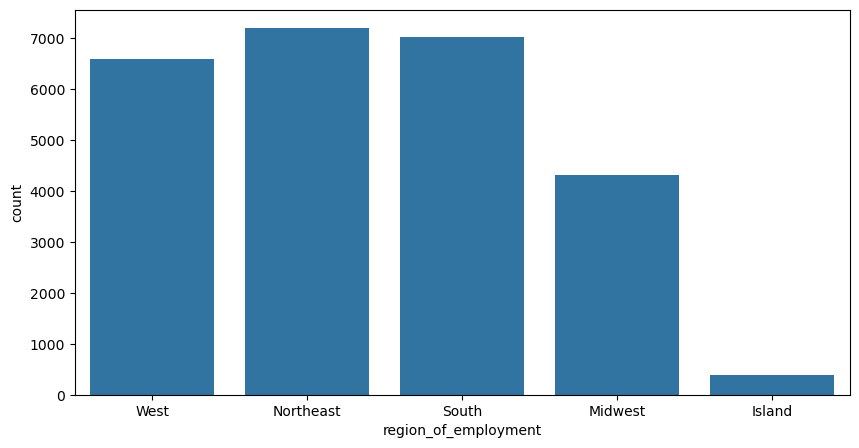

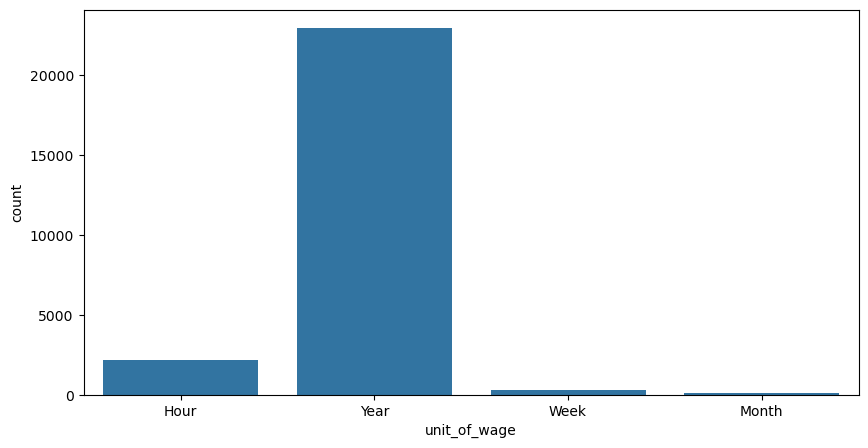

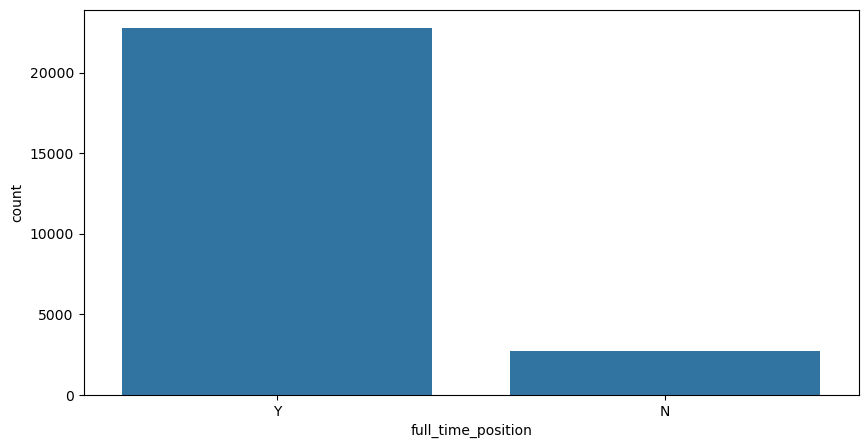

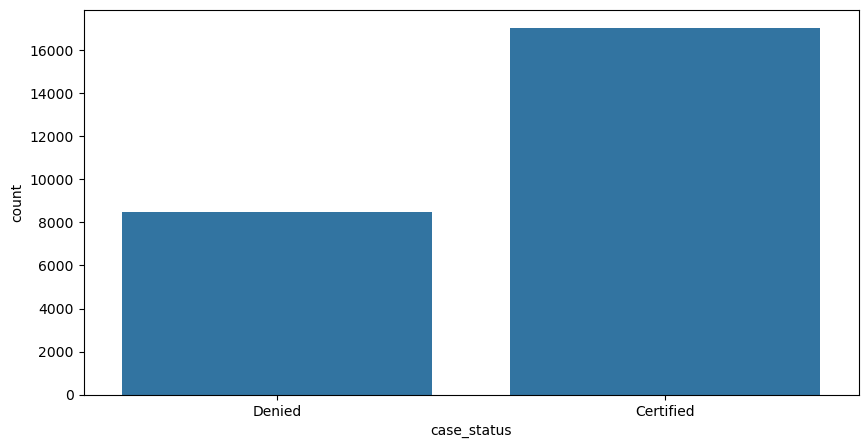

In [120]:
for obj in list_obj:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=obj)
    plt.show()

### Observations:
- Most number of applicants are from Asia which is expected as it has the highest population compared to the other continents
- Most of the applicants have bachelors degree followed by 2nd most number of applicants having masters degree
- Majority of the applicants have job experience
- Majority of the applicants do not need any job training
- Highest number of applicants are applying for Northeast region
- Highest number of applicants are paid in yearly wage
- Majority of the applicants are applying for visa for full time positions
- Majority of the case status are Certified

## Visualizing Numerical Features


--- no_of_employees ---


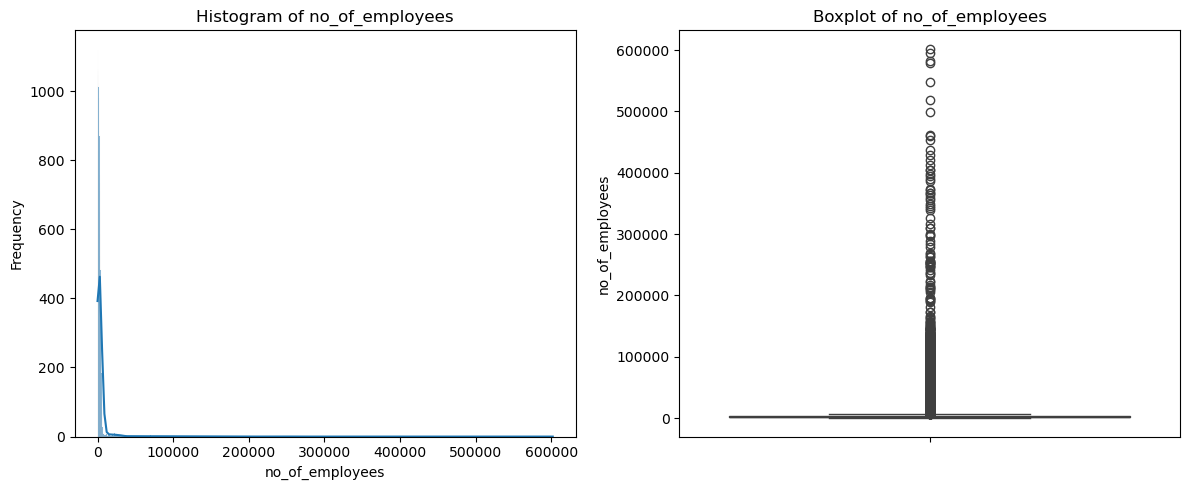


--- yr_of_estab ---


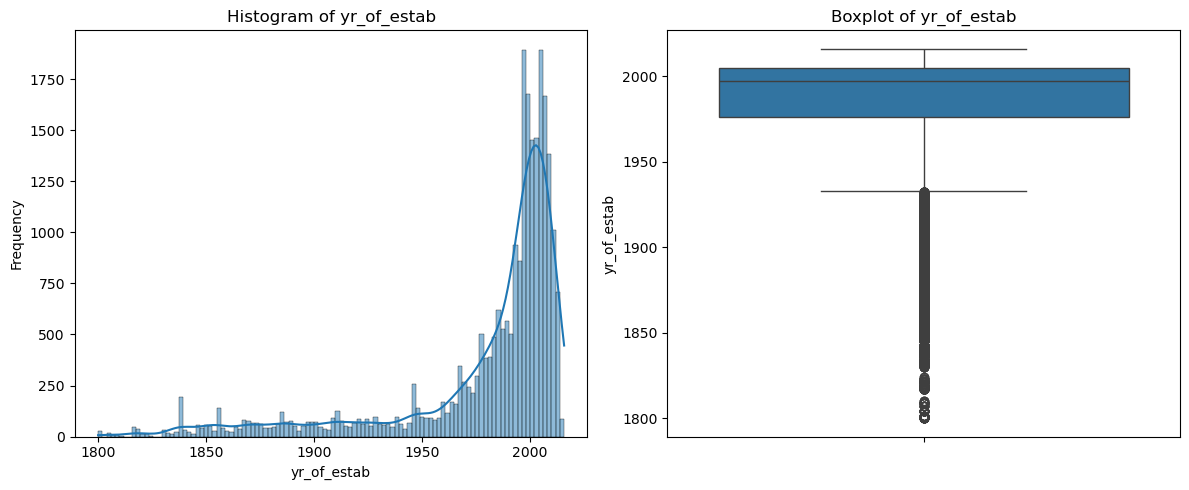


--- prevailing_wage ---


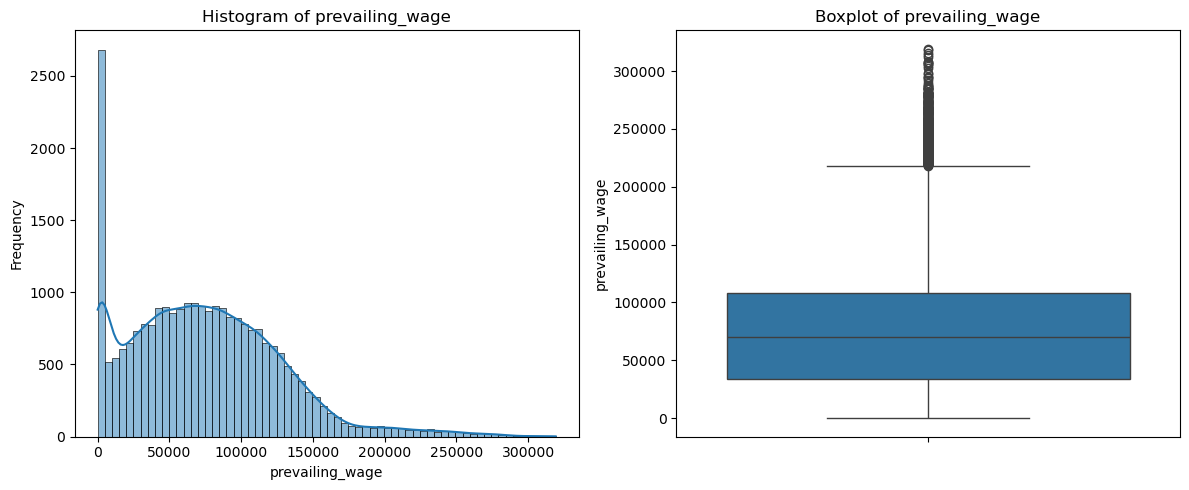

In [121]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(f'\n--- {col} ---')
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

### Observation
In the graph of 'yr_of_estab' we can see that maximum company are establish around the year 2000 +- 10. This also supports the industrialization.

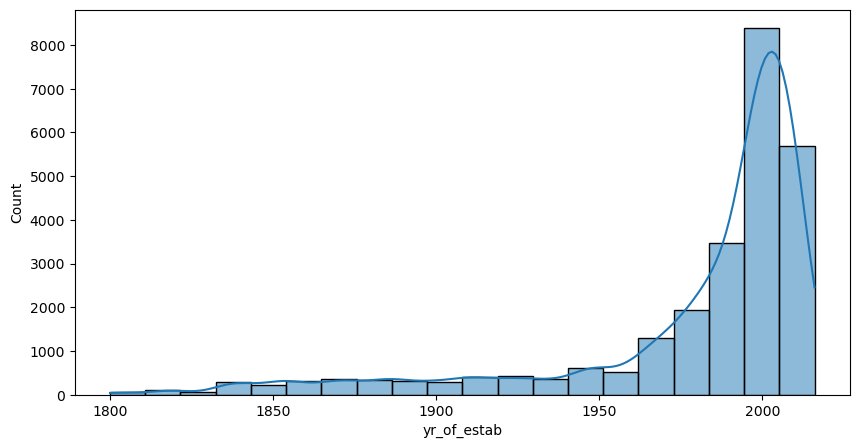

In [122]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='yr_of_estab',kde=True, bins=20)
plt.show()

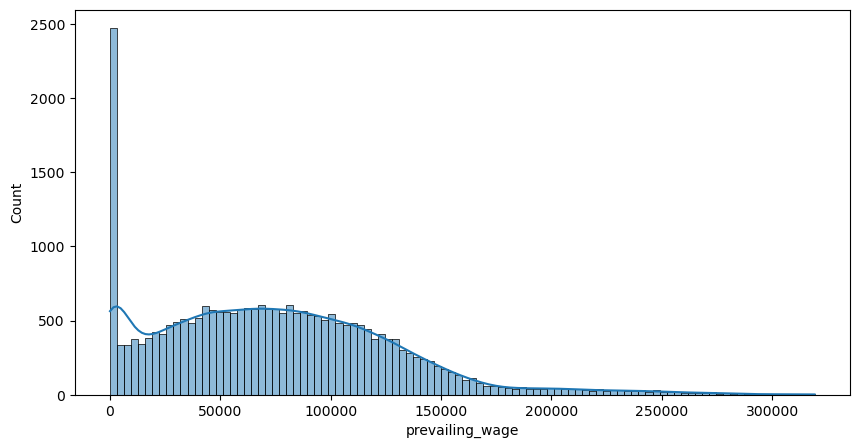

In [123]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='prevailing_wage',kde=True, bins=100)
plt.show()

### Observation
- This is rightly skewed data
- 0-100 wages have got the maximum count
- Medium is around 70-75k so we can not use regression

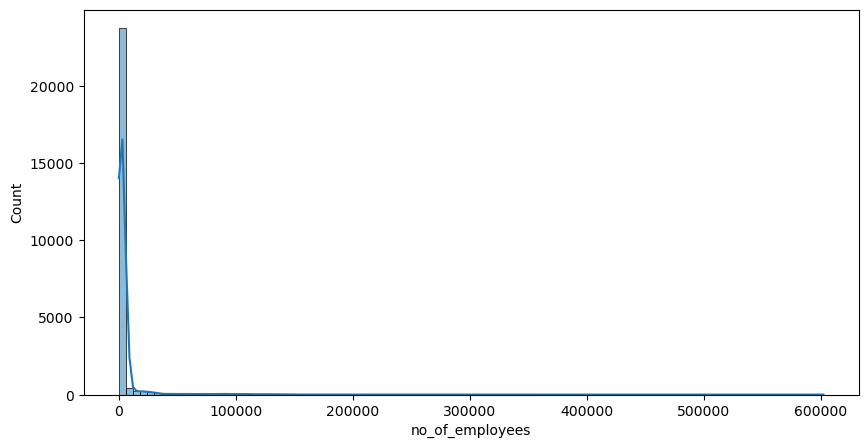

In [124]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='no_of_employees',kde=True, bins=100)
plt.show()

### This above distribution tells that maximun number of company have employee range between 0-100
if we define some categories for company such that small , medium , large on the basis of number of employee such that
small (0<number of employee>=50 )
medium (51< number of employee >=100)
large (100< number of employee )

# Bivariate analysis

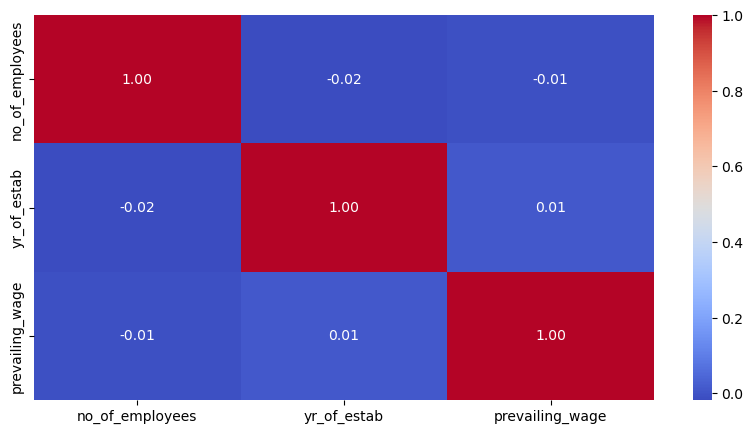

In [125]:
plt.figure(figsize=(10,5))
numeric_data=data.select_dtypes(include=['int64','float64'])
sns.heatmap(data=numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### observation:
There is no significant correlation between the features

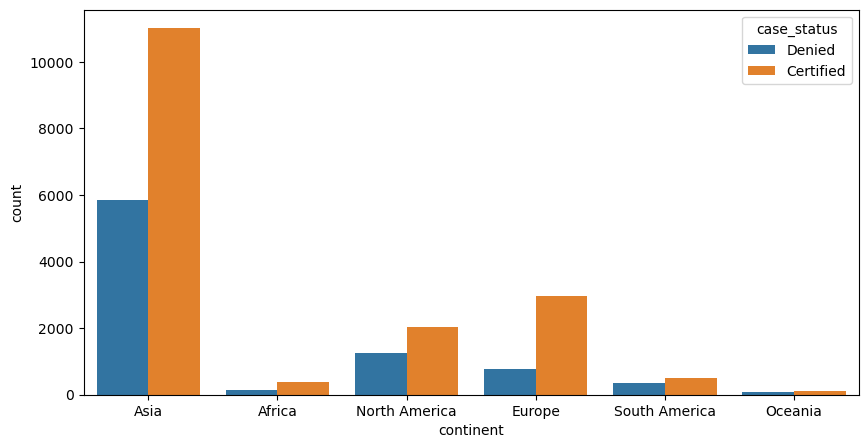

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='continent',hue='case_status')
plt.show()

### Observations:
- Percentage of certified applicants is max from Europe as we can think Europe and USA are allies  (Ratio of certified vs denied)
- Max number of certified applicants are from Asia

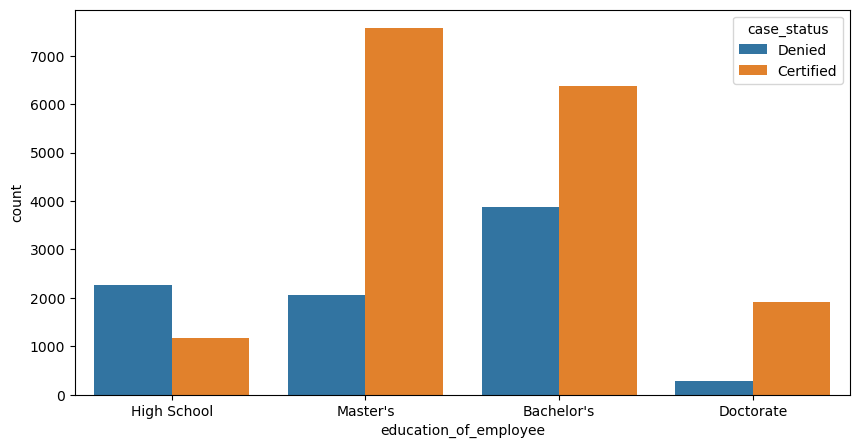

In [127]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='education_of_employee',hue='case_status')
plt.show()

### Observations:
- Applicants with Doctorate degree have a higher chance of being certified followed by Masters, Bachelors and High school
- Master applicant got highest certification

<Figure size 1000x500 with 0 Axes>

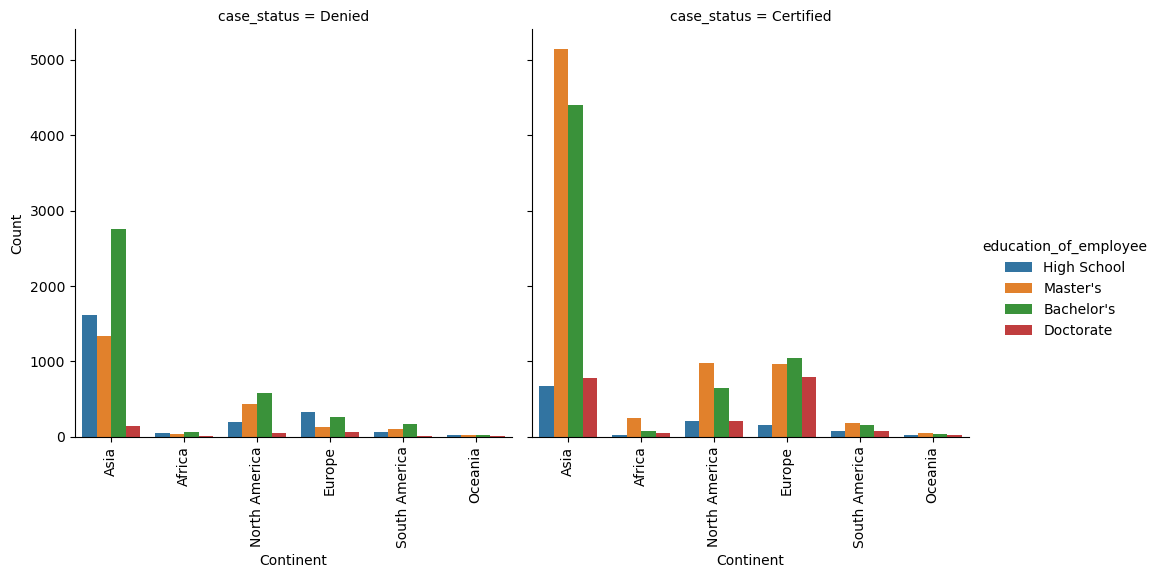

In [128]:
plt.figure(figsize=(10,5))
g = sns.catplot(data=data,x='continent',hue='education_of_employee',col='case_status',kind='count')
plt.xticks(rotation=90)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

g.set_axis_labels("Continent", "Count")
plt.show()


### observation:
1) Europe has the highest number of certified applicants followed by  Asia in terms of ratio between certified and denied applicants.
2) we can get an idea of quality of education in different continent as we can see max of Bachelor's ,Masters and Doctorate from Europe got certification followed by Asia.
3) max number of certification are from Asia as we know Asia has highest population

<Figure size 1000x500 with 0 Axes>

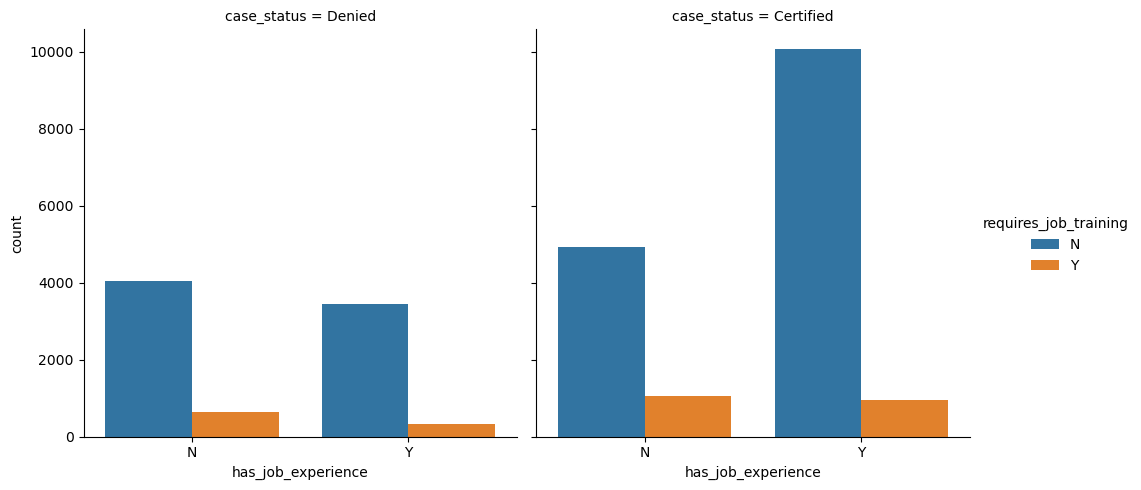

In [129]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='has_job_experience',hue='requires_job_training',col='case_status',kind='count')

### observation:
 1) we can see that applicant having job experience required less job training  that obivious .
 2) people with job experience has more tendency to get certification

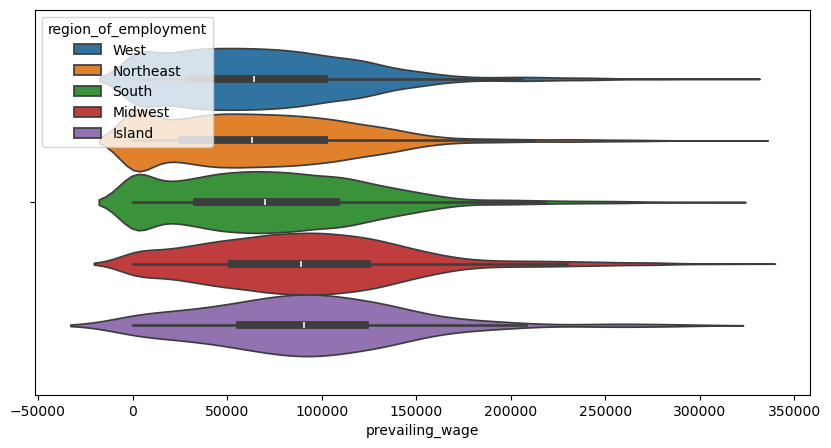

In [130]:
plt.figure(figsize=(10,5))
sns.violinplot (data=data,hue='region_of_employment',x='prevailing_wage')
plt.show()

### observation:
1) we can see that people working in island got max prevailing wage
2) there are some outlier that shows that every employee has different prevailing wage that obivious due to there difference in work experience
3) people working in Northeast has lowest prevailing wages

<Figure size 1000x500 with 0 Axes>

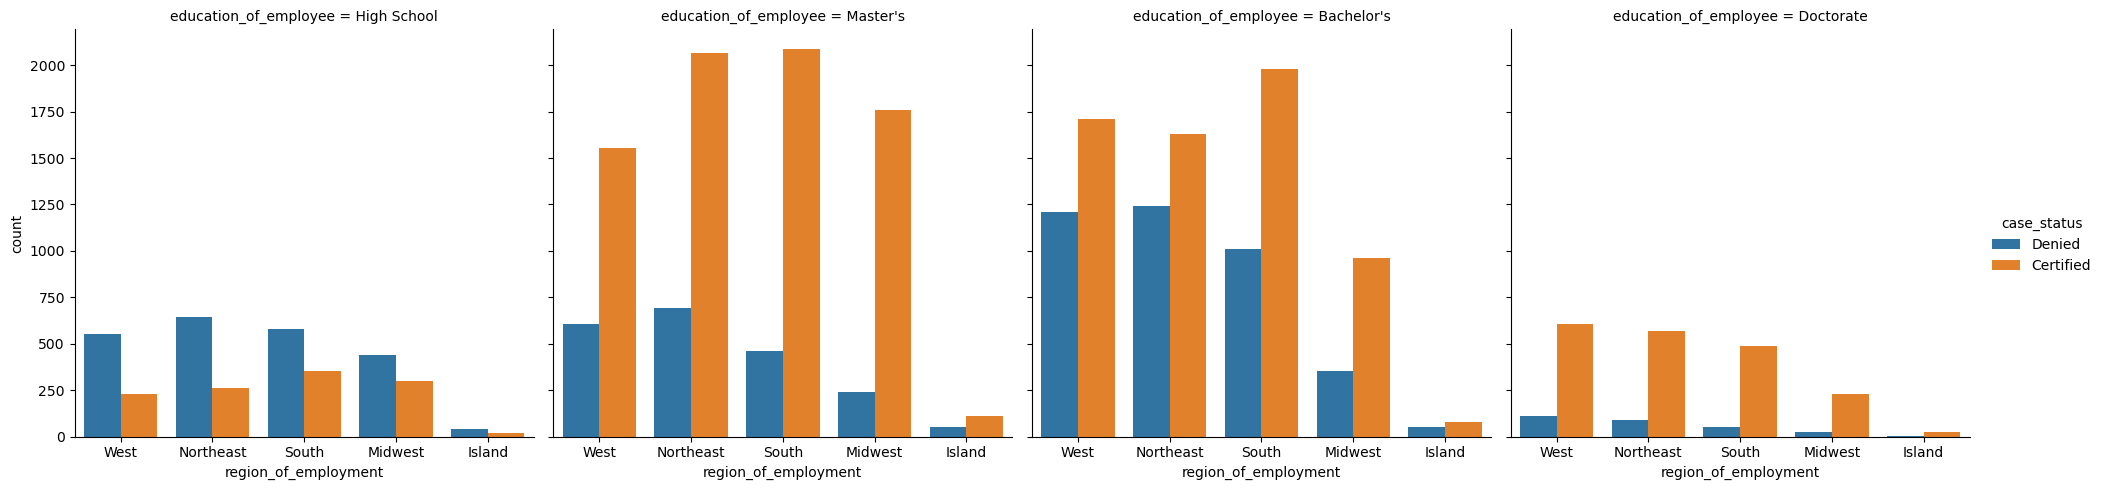

In [131]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='region_of_employment',hue='case_status',col='education_of_employee',kind='count')

### observtion:
1) NorthEast and south has highest job for master's and Bachelor's applicant so we can say that more of technical work is done here
2) West has highest job for doctrate applicant if a applicant has a doctorate degree should apply in west,or we can say that for research oriented work is done in west region
3) We can see that number of certification for high school applicant is very less and by this data we can say that most of the labour work is done in northeast. we can also guass that most of the population is in Northeast, West region as we can see we require more labour there


<Figure size 1000x500 with 0 Axes>

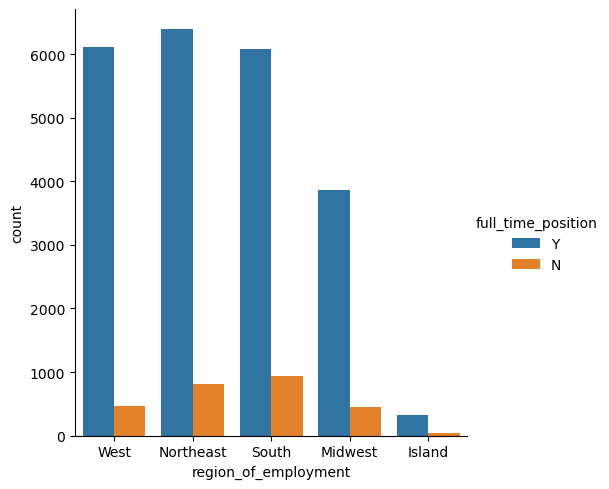

In [132]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='region_of_employment',hue='full_time_position',kind='count')

### observation:
1) South has the max number of part time position.
2) Northeast has the max number of full time position.
3) we seen that full time position are more then part time position.

<Figure size 1000x500 with 0 Axes>

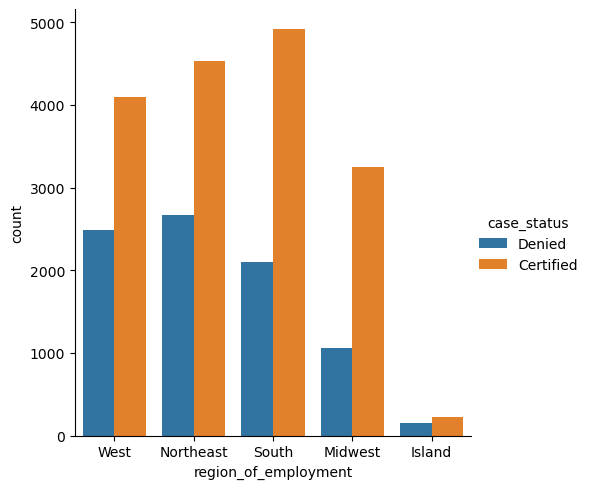

In [133]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='region_of_employment',hue='case_status',kind='count')

### observation:
1) Max certification is coming from south region
2) the ratio between certified and denied is in Midwest

<Axes: xlabel='prevailing_wage'>

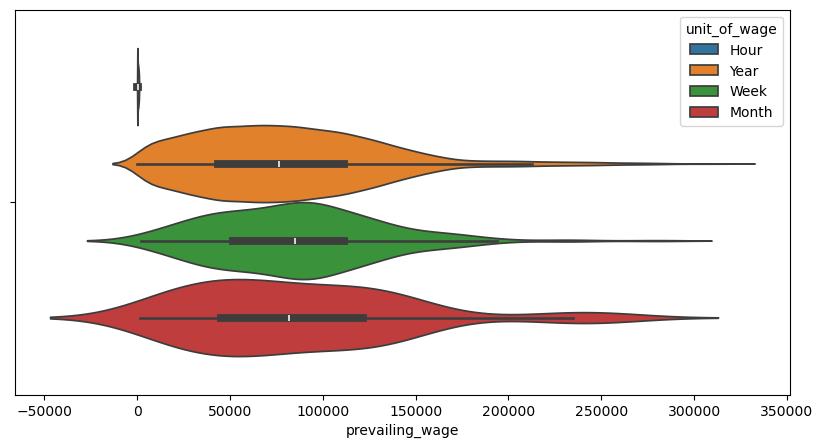

In [134]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='prevailing_wage',hue='unit_of_wage')

### observation:
People working on weekly basis tend to get higher wages

<Figure size 1000x500 with 0 Axes>

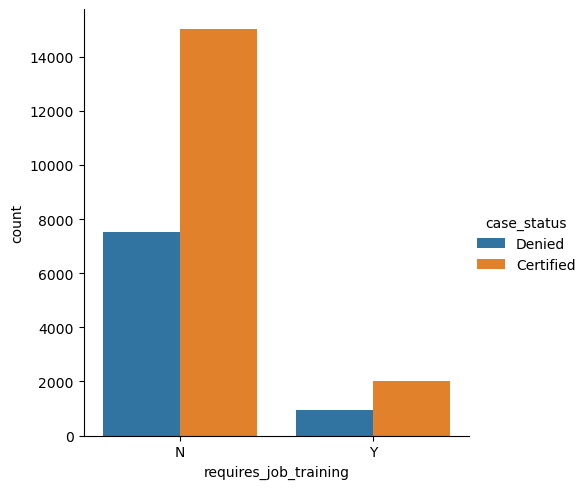

In [135]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='requires_job_training',hue='case_status',kind='count')

### observation:
people who are talented and does not require training are preferred

<Axes: xlabel='no_of_employees'>

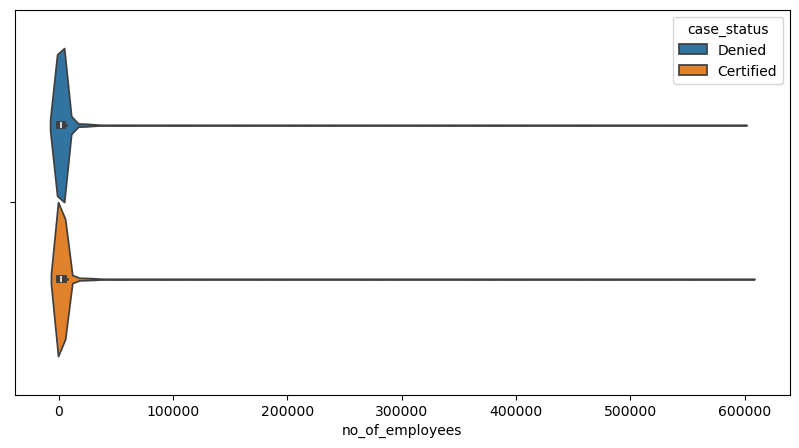

In [136]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='no_of_employees',hue='case_status')

### observation:
there is not any significant relation between number of employee and status

<Axes: xlabel='no_of_employees'>

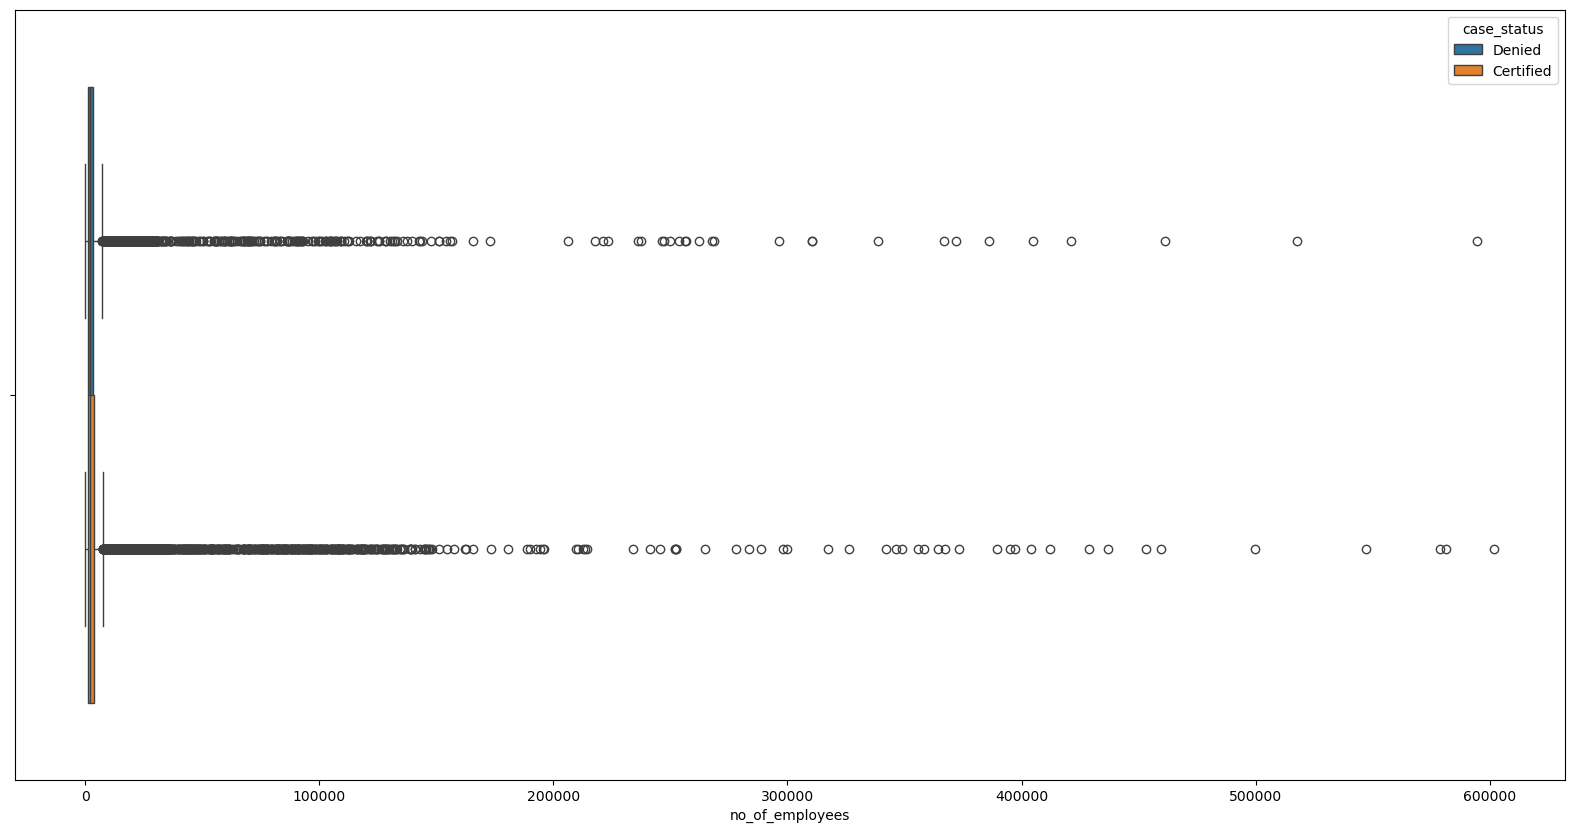

In [137]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x='no_of_employees',hue='case_status')

<Figure size 1000x500 with 0 Axes>

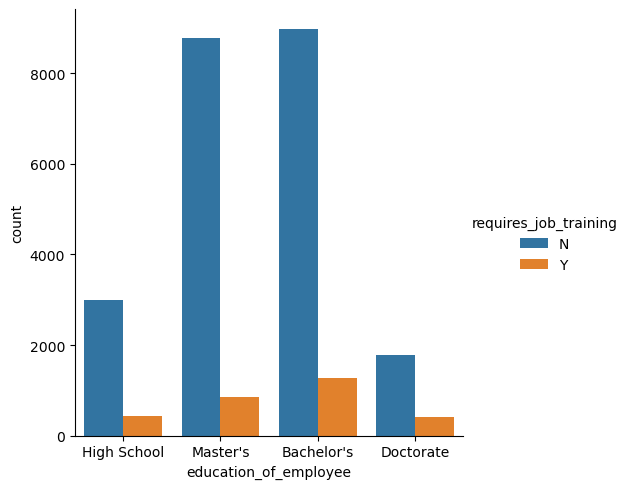

In [138]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='education_of_employee' ,hue='requires_job_training', kind= 'count')

### observation:
 max training is given to bachelor's applicant

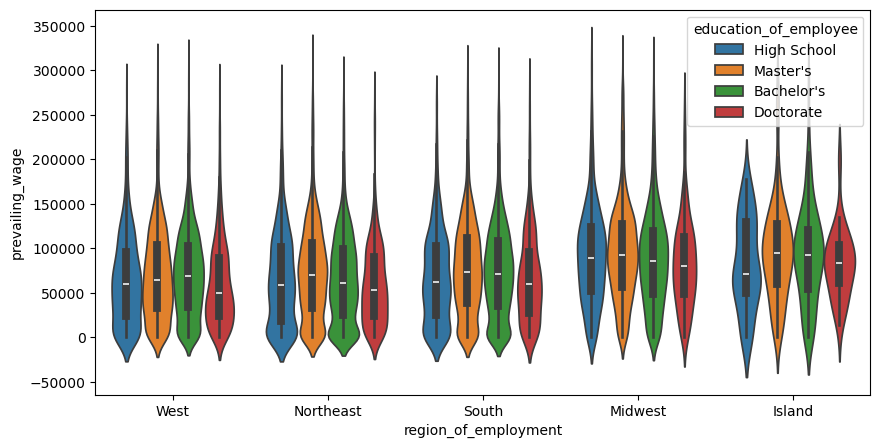

In [139]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='region_of_employment' , y= 'prevailing_wage', hue='education_of_employee')
plt.show()

### observation:
1) High school aplicant are geting more wages in Midwest region
2) Doctorate applicant tends to earn more in island as compareed to other regions
3) Midwest and island are favourable for master's applicant
4) Overall wages are tends to more in island and Midwest

# Pre-processing  of data

In [140]:
# checking for negative values and droping them
data = data[data['no_of_employees'] > 0].reset_index(drop=True)


In [141]:
# Standardize 'no_of_employees' using z-score
data['no_of_employees_zscore'] = zscore(data['no_of_employees'])

# Drop the original 'no_of_employees' column
data = data.drop(columns=['no_of_employees'])



In [142]:
# Step 1: Create 'org_age_2017' from 'yr_of_estab' and drop original
data['org_age_2017'] = 2017 - data['yr_of_estab']
data = data.drop(columns=['yr_of_estab'])

In [143]:
# checking for negative values in numeric column
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if (data[col] <= 0).any():
        print(f"Column '{col}' contains values less than or equal to zero.")
    else:
        print(f"Column '{col}' does NOT contain values less than or equal to zero.")


Column 'prevailing_wage' does NOT contain values less than or equal to zero.
Column 'no_of_employees_zscore' contains values less than or equal to zero.
Column 'org_age_2017' does NOT contain values less than or equal to zero.


In [144]:
# Convert 'prevailing_wage' into annual wages using USA standard working hours and drop original wage columns
def convert_to_annual_wage(row):
    wage = row['prevailing_wage']
    unit = str(row['unit_of_wage']).strip().lower()
    if unit == 'hour':
        # USA standard: 40 hours/week, 52 weeks/year = 2080 hours/year
        return wage * 2080
    elif unit == 'month':
        return wage * 12
    elif unit == 'week':
        return wage * 52
    elif unit == 'year':
        return wage
    else:
        return np.nan

data['annual_wage'] = data.apply(convert_to_annual_wage, axis=1)
data = data.drop(columns=['prevailing_wage', 'unit_of_wage'])

In [145]:
# converting annual_wage to z_score
data['annual_wage_z_score']= zscore(data['annual_wage'])
data= data.drop(columns=['annual_wage'])
data.columns


Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'full_time_position',
       'case_status', 'no_of_employees_zscore', 'org_age_2017',
       'annual_wage_z_score'],
      dtype='object')

In [146]:
# converting org_age_2107 to z_score
data['org_age_2017_z_score']=zscore(data['org_age_2017'])
data =data.drop(columns=['org_age_2017'])

In [147]:
list_obj = ['continent', 'education_of_employee', 'has_job_experience',
            'requires_job_training', 'region_of_employment',
            'full_time_position']

# 1. One-hot encode categorical columns except 'case_status'
data_encoded = pd.get_dummies(data, columns=list_obj, dtype=int, drop_first= True)

# 2. Convert 'case_status' to binary variable (0 = Denied, 1 = Certified)
data_encoded['case_status'] = data_encoded['case_status'].map({'Denied': 0, 'Certified': 1})




# Loading the pre-processed data in csv file to view

In [148]:
data_encoded.to_csv('updated_dataset.csv', index=False)  # saves without the DataFrame index column


# Dividing the dataset into train, validation and test dataset

In [149]:
X=data_encoded.drop('case_status',axis=1)
y=data_encoded['case_status']

In [150]:
X_temp, X_test, y_temp, y_test=train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)

X_train, X_val, y_train, y_val=train_test_split(X_temp,y_temp,test_size=0.15,random_state=42,stratify=y_temp)

# Model evaluation criteria

### What does the Business communities want?
High recall for “Certified” may be prioritized to ensure eligible applicants are not wrongly denied.
So 'recall' is the best criteria

### What does the OFLC want?
High precision for “Certified” may be prioritized to avoid letting in unqualified or risky applicants.
So 'Precision' is the best criteria

In most real-world government or regulatory scenarios, precision for the “Certified” (approved) class is often prioritized, because granting a visa to an unqualified applicant can have greater consequences than denying one by mistake.

# Creating a function to display all the models

In [151]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

def evaluate_and_plot(models, X_train, y_train, X_val, y_val, smote_strategy=0.6, under_strategy=0.6):
    def train_evaluate(model, X_tr, y_tr, X_v, y_v):
        model.fit(X_tr, y_tr)
        y_tr_pred = model.predict(X_tr)
        y_v_pred = model.predict(X_v)
        tr_acc = accuracy_score(y_tr, y_tr_pred)
        v_acc = accuracy_score(y_v, y_v_pred)
        tr_prec = precision_score(y_tr, y_tr_pred)
        v_prec = precision_score(y_v, y_v_pred)
        tr_rec = recall_score(y_tr, y_tr_pred)
        v_rec = recall_score(y_v, y_v_pred)
        tr_cm = confusion_matrix(y_tr, y_tr_pred)
        v_cm = confusion_matrix(y_v, y_v_pred)
        return tr_acc, v_acc, tr_prec, v_prec, tr_rec, v_rec, tr_cm, v_cm

    print("\n--- Original Dataset ---")
    for name, clf in models.items():
        tr_acc, v_acc, tr_prec, v_prec, tr_rec, v_rec, tr_cm, v_cm = train_evaluate(clf, X_train, y_train, X_val, y_val)
        print(f"{name} - Train Acc: {tr_acc:.4f}, Val Acc: {v_acc:.4f}")
        print(f"Train Precision: {tr_prec:.4f}, Validation Precision: {v_prec:.4f}")
        print(f"Train Recall: {tr_rec:.4f}, Validation Recall: {v_rec:.4f}")
        plot_confusion_matrix(tr_cm, f'{name} Train Confusion Matrix')
        plot_confusion_matrix(v_cm, f'{name} Validation Confusion Matrix')

    # Oversampling with SMOTE
    smote = SMOTE(sampling_strategy=smote_strategy, k_neighbors=6, random_state=42)
    X_train_os, y_train_os = smote.fit_resample(X_train, y_train)
    print("\n--- After SMOTE Oversampling ---")
    for name, clf in models.items():
        tr_acc, v_acc, tr_prec, v_prec, tr_rec, v_rec, tr_cm, v_cm = train_evaluate(clf, X_train_os, y_train_os, X_val, y_val)
        print(f"{name} - Train Acc: {tr_acc:.4f}, Val Acc: {v_acc:.4f}")
        print(f"Train Precision: {tr_prec:.4f}, Validation Precision: {v_prec:.4f}")
        print(f"Train Recall: {tr_rec:.4f}, Validation Recall: {v_rec:.4f}")
        plot_confusion_matrix(tr_cm, f'{name} Train Confusion Matrix (SMOTE)')
        plot_confusion_matrix(v_cm, f'{name} Validation Confusion Matrix (SMOTE)')

    # Undersampling majority
    under_sampler = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
    X_train_us, y_train_us = under_sampler.fit_resample(X_train, y_train)
    print("\n--- After Undersampling ---")
    for name, clf in models.items():
        tr_acc, v_acc, tr_prec, v_prec, tr_rec, v_rec, tr_cm, v_cm = train_evaluate(clf, X_train_us, y_train_us, X_val, y_val)
        print(f"{name} - Train Acc: {tr_acc:.4f}, Val Acc: {v_acc:.4f}")
        print(f"Train Precision: {tr_prec:.4f}, Validation Precision: {v_prec:.4f}")
        print(f"Train Recall: {tr_rec:.4f}, Validation Recall: {v_rec:.4f}")
        plot_confusion_matrix(tr_cm, f'{name} Train Confusion Matrix (Undersample)')
        plot_confusion_matrix(v_cm, f'{name} Validation Confusion Matrix (Undersample)')



--- Original Dataset ---
Bagging - Train Acc: 0.9834, Val Acc: 0.6955
Train Precision: 0.9908, Validation Precision: 0.7754
Train Recall: 0.9843, Validation Recall: 0.7661


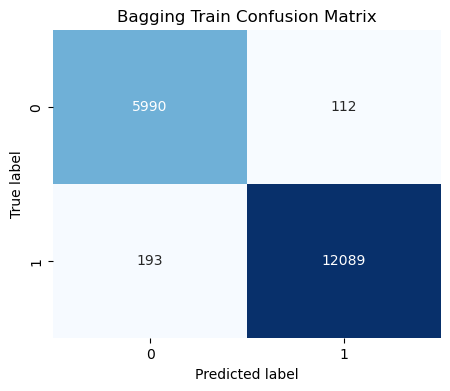

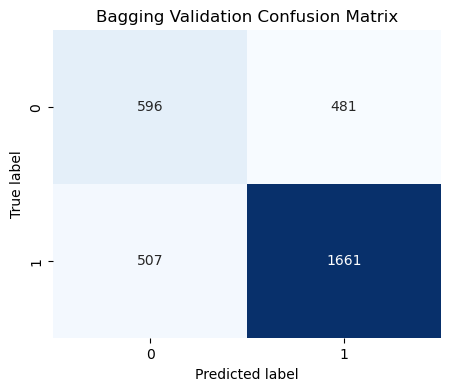

AdaBoost - Train Acc: 0.7345, Val Acc: 0.7334
Train Precision: 0.7609, Validation Precision: 0.7560
Train Recall: 0.8786, Validation Recall: 0.8875


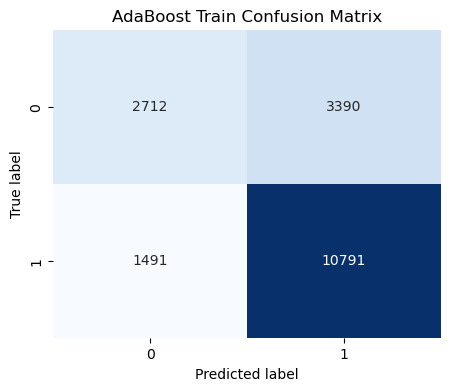

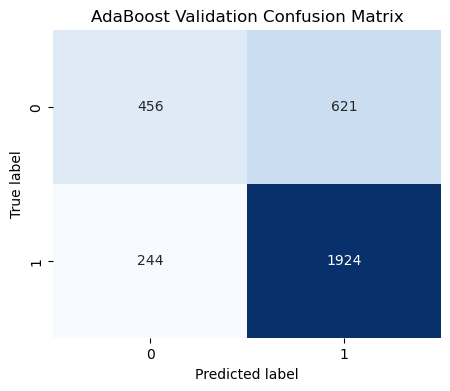

Random Forest - Train Acc: 1.0000, Val Acc: 0.7310
Train Precision: 1.0000, Validation Precision: 0.7706
Train Recall: 1.0000, Validation Recall: 0.8506


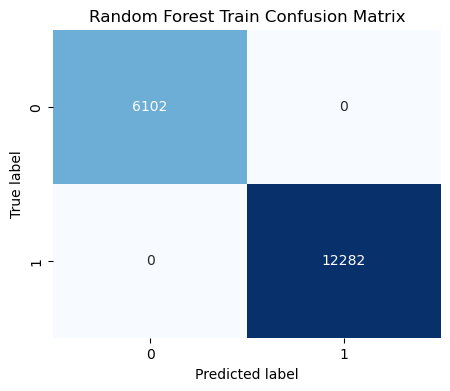

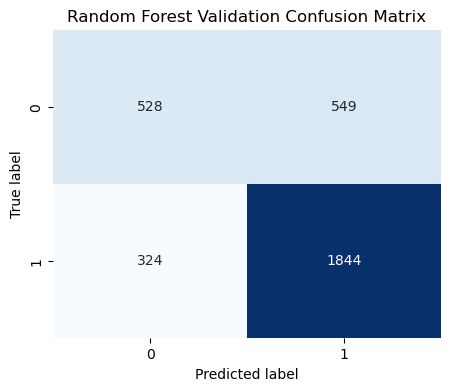

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6650
Train Precision: 1.0000, Validation Precision: 0.7517
Train Recall: 1.0000, Validation Recall: 0.7445


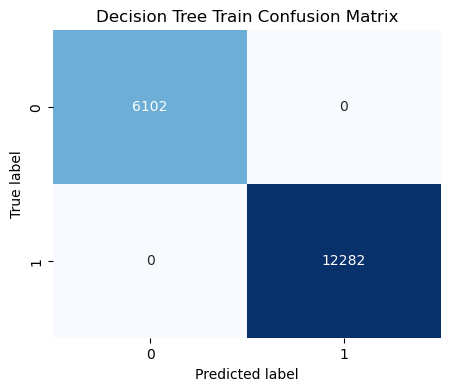

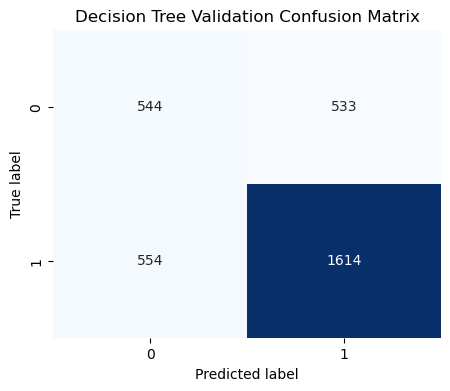

XGBoost - Train Acc: 0.8417, Val Acc: 0.7341
Train Precision: 0.8484, Validation Precision: 0.7700
Train Recall: 0.9290, Validation Recall: 0.8584


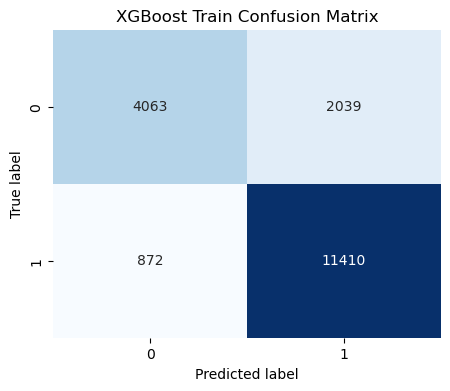

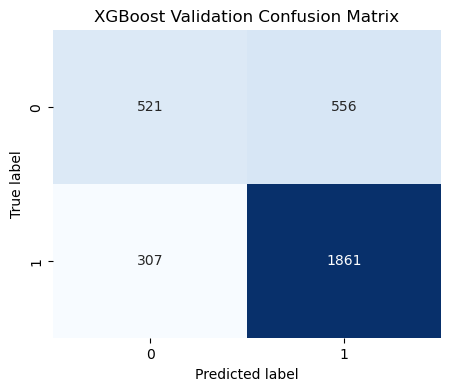


--- After SMOTE Oversampling ---
Bagging - Train Acc: 0.9833, Val Acc: 0.6906
Train Precision: 0.9913, Validation Precision: 0.7803
Train Recall: 0.9819, Validation Recall: 0.7472


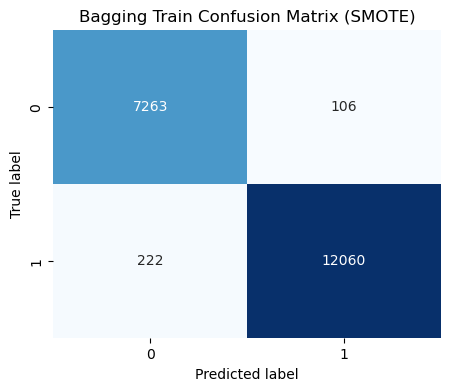

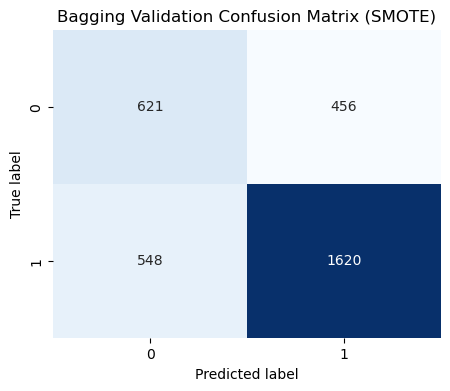

AdaBoost - Train Acc: 0.7197, Val Acc: 0.7368
Train Precision: 0.7336, Validation Precision: 0.7658
Train Recall: 0.8661, Validation Recall: 0.8732


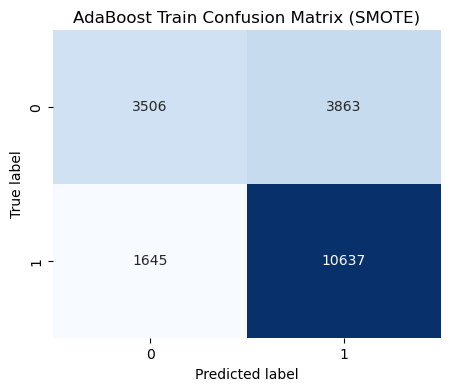

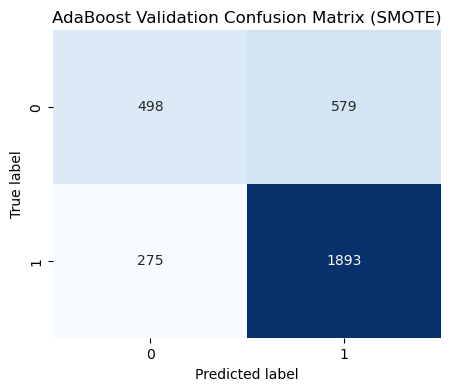

Random Forest - Train Acc: 0.9999, Val Acc: 0.7270
Train Precision: 0.9999, Validation Precision: 0.7787
Train Recall: 1.0000, Validation Recall: 0.8261


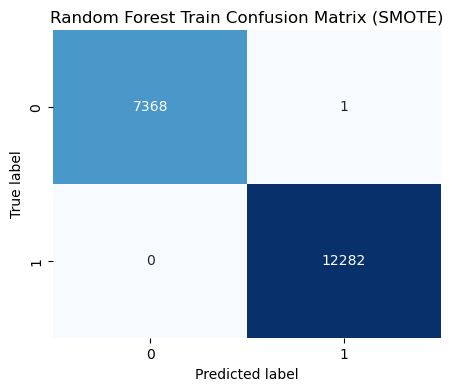

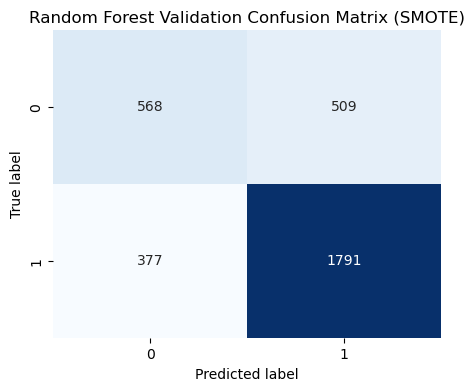

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6586
Train Precision: 1.0000, Validation Precision: 0.7524
Train Recall: 1.0000, Validation Recall: 0.7288


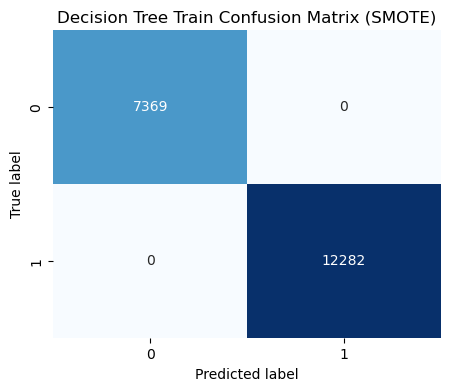

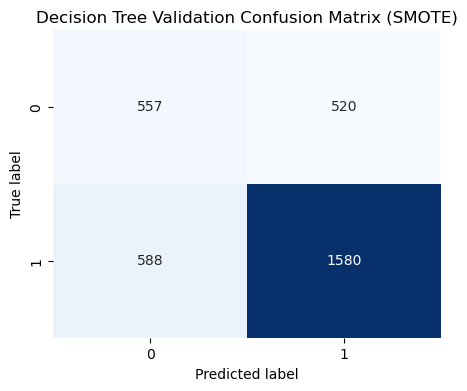

XGBoost - Train Acc: 0.8335, Val Acc: 0.7297
Train Precision: 0.8413, Validation Precision: 0.7772
Train Recall: 0.9043, Validation Recall: 0.8349


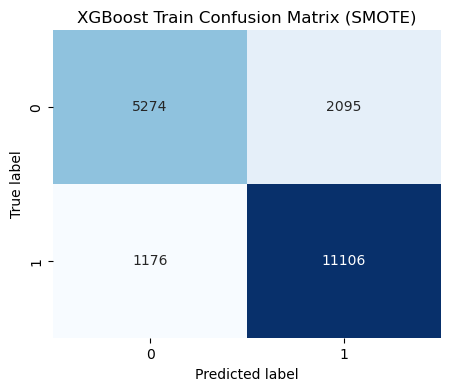

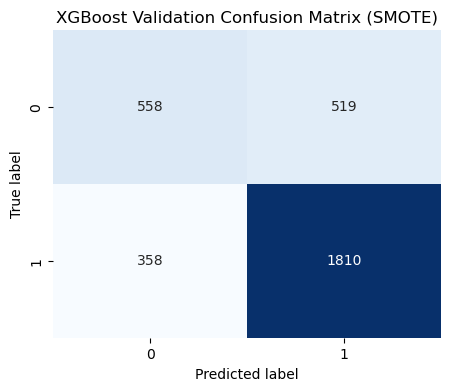


--- After Undersampling ---
Bagging - Train Acc: 0.9841, Val Acc: 0.6826
Train Precision: 0.9920, Validation Precision: 0.7725
Train Recall: 0.9825, Validation Recall: 0.7440


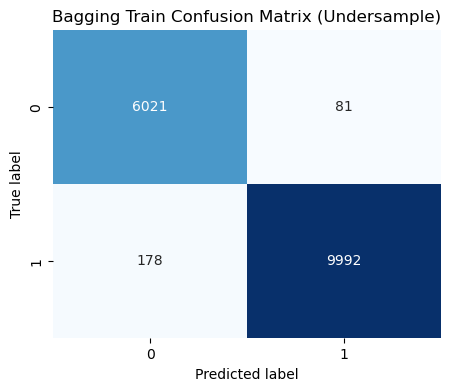

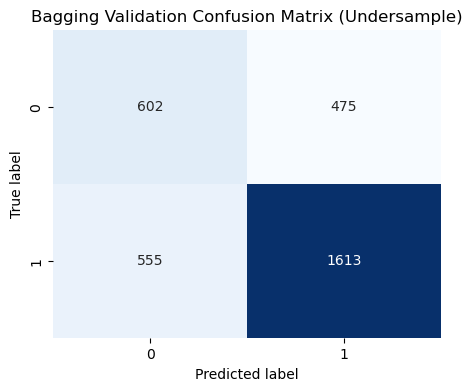

AdaBoost - Train Acc: 0.7211, Val Acc: 0.7390
Train Precision: 0.7365, Validation Precision: 0.7690
Train Recall: 0.8622, Validation Recall: 0.8708


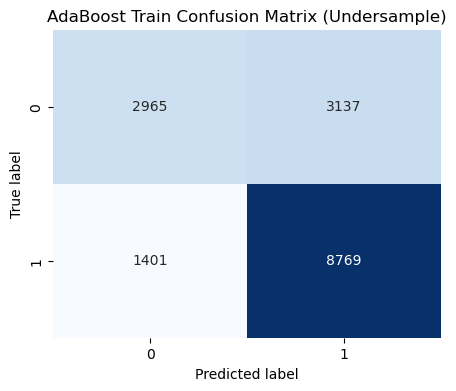

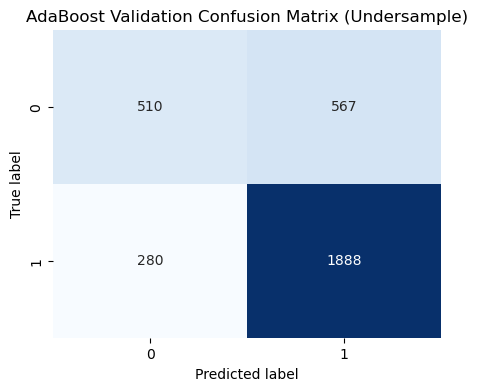

Random Forest - Train Acc: 1.0000, Val Acc: 0.7190
Train Precision: 1.0000, Validation Precision: 0.7781
Train Recall: 1.0000, Validation Recall: 0.8104


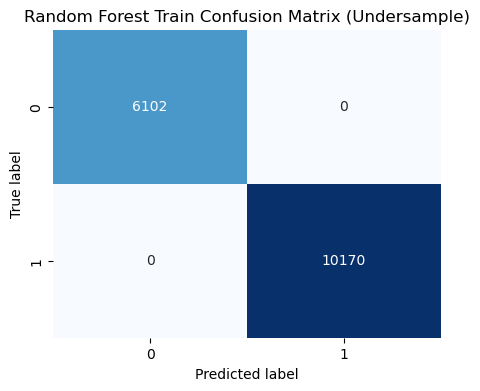

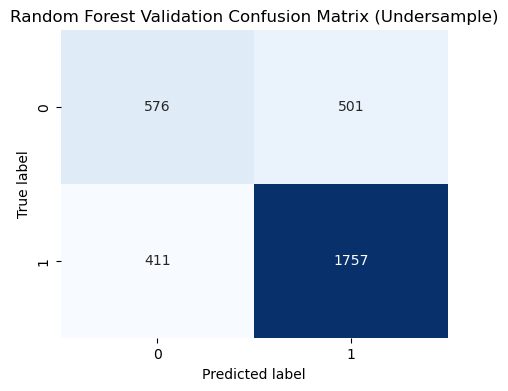

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6484
Train Precision: 1.0000, Validation Precision: 0.7492
Train Recall: 1.0000, Validation Recall: 0.7122


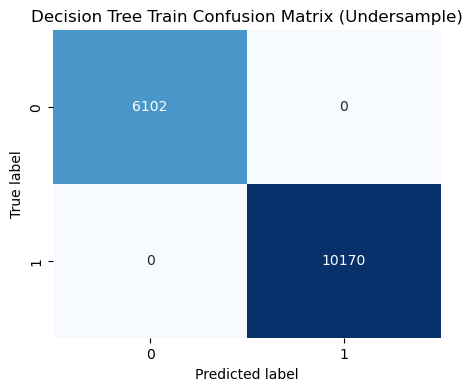

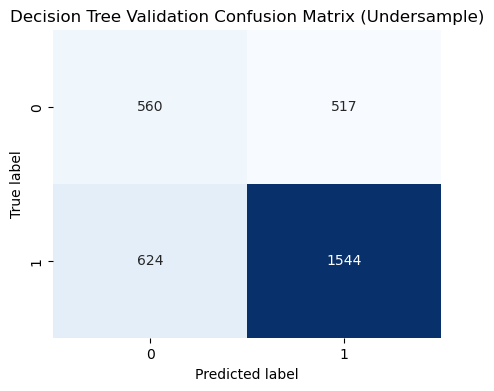

XGBoost - Train Acc: 0.8395, Val Acc: 0.7211
Train Precision: 0.8437, Validation Precision: 0.7742
Train Recall: 0.9123, Validation Recall: 0.8224


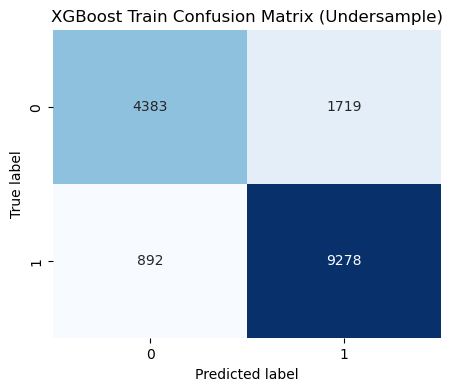

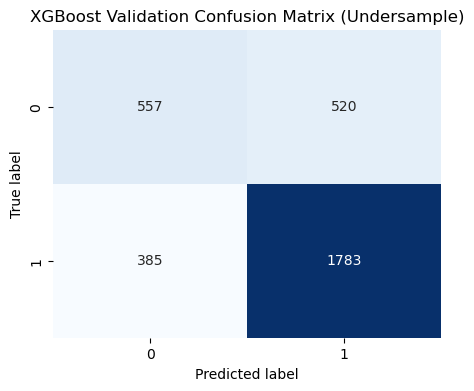

In [152]:
models = {
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

evaluate_and_plot(models, X_train, y_train, X_val, y_val)


In [153]:


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

def evaluate_and_summarize(models, X_train, y_train, X_val, y_val, smote_strategy=0.6, under_strategy=0.6):
    def train_evaluate(model, X_tr, y_tr, X_v, y_v):
        model.fit(X_tr, y_tr)
        y_tr_pred = model.predict(X_tr)
        y_v_pred = model.predict(X_v)
        metrics = {
            'Train Accuracy': accuracy_score(y_tr, y_tr_pred),
            'Val Accuracy': accuracy_score(y_v, y_v_pred),
            'Train Precision': precision_score(y_tr, y_tr_pred),
            'Val Precision': precision_score(y_v, y_v_pred),
            'Train Recall': recall_score(y_tr, y_tr_pred),
            'Val Recall': recall_score(y_v, y_v_pred),
            'Train Confusion Matrix': confusion_matrix(y_tr, y_tr_pred),
            'Val Confusion Matrix': confusion_matrix(y_v, y_v_pred),
        }
        return metrics

    results = []
    data_stages = {
        'Original': (X_train, y_train),
        'SMOTE Oversampled': SMOTE(sampling_strategy=smote_strategy, k_neighbors=6, random_state=42).fit_resample(X_train, y_train),
        'Undersampled': RandomUnderSampler(sampling_strategy=under_strategy, random_state=42).fit_resample(X_train, y_train)
    }

    for stage_name, (X_tr, y_tr) in data_stages.items():
        print(f"\n--- {stage_name} Dataset ---")
        for name, clf in models.items():
            metrics = train_evaluate(clf, X_tr, y_tr, X_val, y_val)
            results.append({
                'Model': name,
                'Dataset': stage_name,
                **{k: v for k, v in metrics.items() if 'Confusion' not in k}
            })
            # Plot confusion matrices
            plot_confusion_matrix(metrics['Train Confusion Matrix'], f'{name} Train Confusion Matrix ({stage_name})')
            plot_confusion_matrix(metrics['Val Confusion Matrix'], f'{name} Validation Confusion Matrix ({stage_name})')

            print(f"{name} - Train Acc: {metrics['Train Accuracy']:.4f}, Val Acc: {metrics['Val Accuracy']:.4f}")
            print(f"Train Precision: {metrics['Train Precision']:.4f}, Validation Precision: {metrics['Val Precision']:.4f}")
            print(f"Train Recall: {metrics['Train Recall']:.4f}, Validation Recall: {metrics['Val Recall']:.4f}\n")

    # Create summary DataFrame
    summary_df = pd.DataFrame(results)
    print("\n=== Summary Table ===")
    print(summary_df)

    return summary_df



--- Original Dataset ---


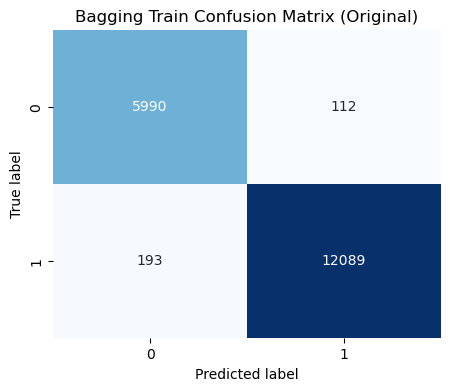

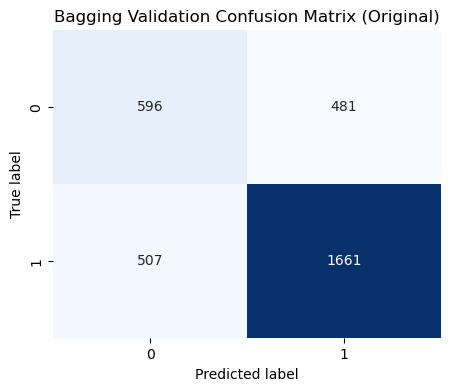

Bagging - Train Acc: 0.9834, Val Acc: 0.6955
Train Precision: 0.9908, Validation Precision: 0.7754
Train Recall: 0.9843, Validation Recall: 0.7661



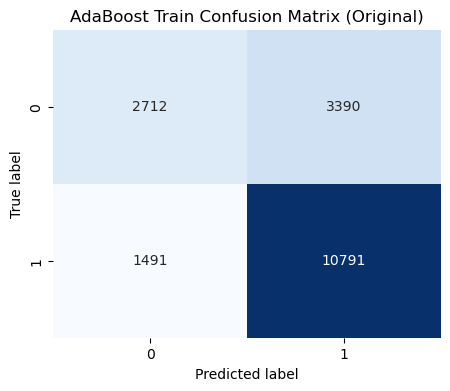

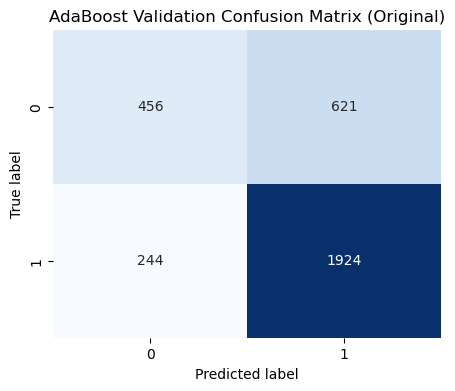

AdaBoost - Train Acc: 0.7345, Val Acc: 0.7334
Train Precision: 0.7609, Validation Precision: 0.7560
Train Recall: 0.8786, Validation Recall: 0.8875



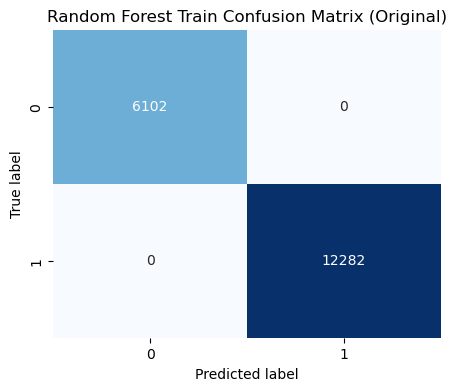

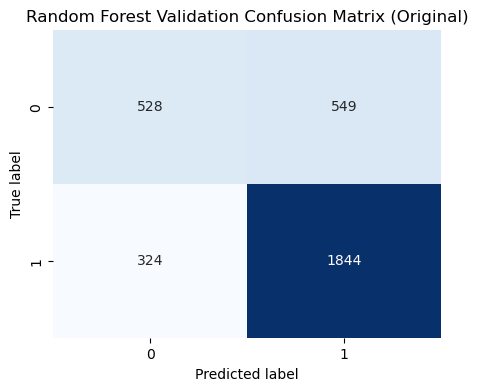

Random Forest - Train Acc: 1.0000, Val Acc: 0.7310
Train Precision: 1.0000, Validation Precision: 0.7706
Train Recall: 1.0000, Validation Recall: 0.8506



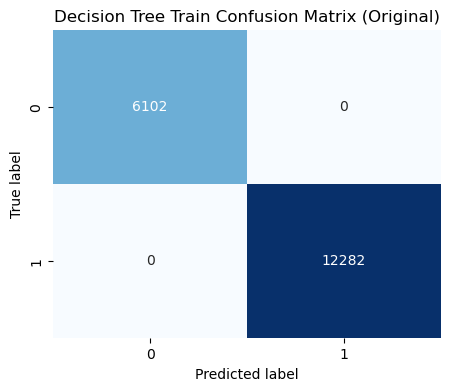

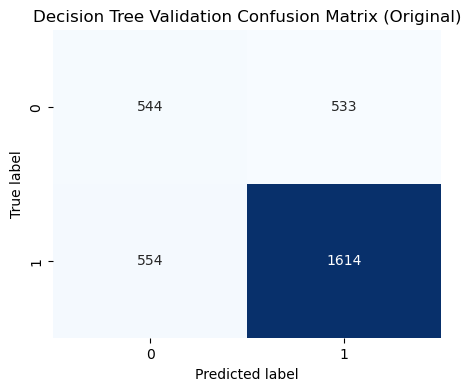

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6650
Train Precision: 1.0000, Validation Precision: 0.7517
Train Recall: 1.0000, Validation Recall: 0.7445



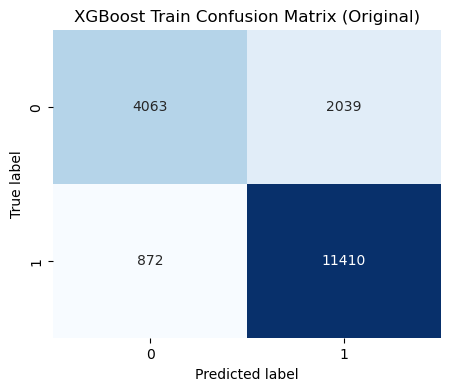

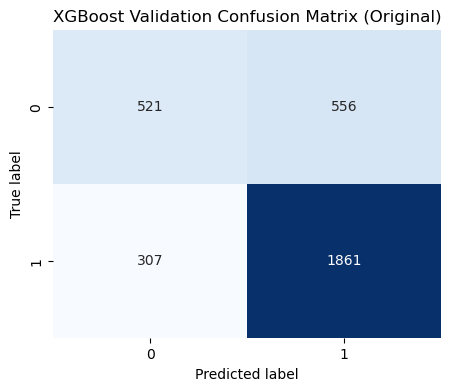

XGBoost - Train Acc: 0.8417, Val Acc: 0.7341
Train Precision: 0.8484, Validation Precision: 0.7700
Train Recall: 0.9290, Validation Recall: 0.8584


--- SMOTE Oversampled Dataset ---


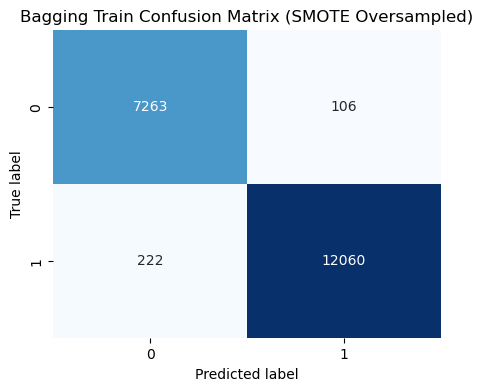

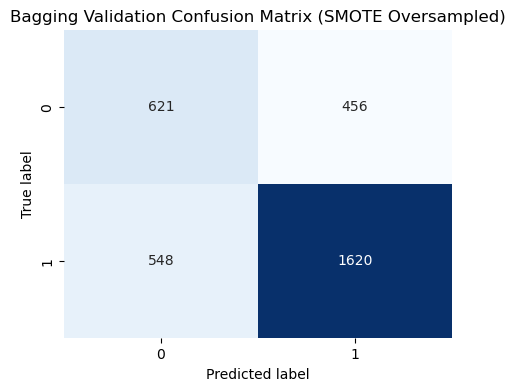

Bagging - Train Acc: 0.9833, Val Acc: 0.6906
Train Precision: 0.9913, Validation Precision: 0.7803
Train Recall: 0.9819, Validation Recall: 0.7472



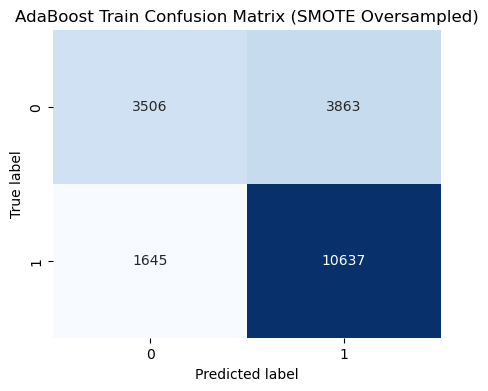

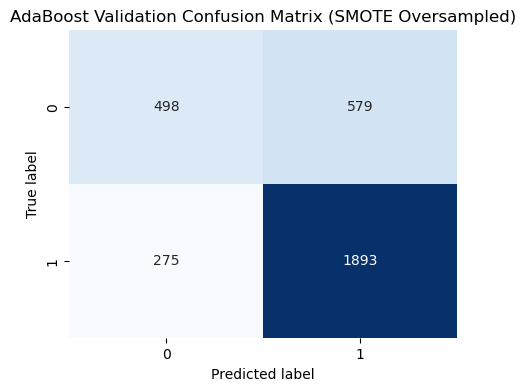

AdaBoost - Train Acc: 0.7197, Val Acc: 0.7368
Train Precision: 0.7336, Validation Precision: 0.7658
Train Recall: 0.8661, Validation Recall: 0.8732



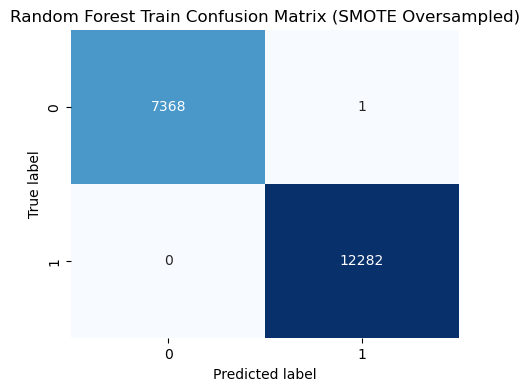

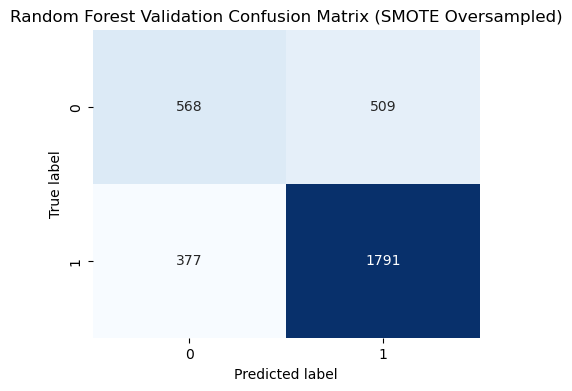

Random Forest - Train Acc: 0.9999, Val Acc: 0.7270
Train Precision: 0.9999, Validation Precision: 0.7787
Train Recall: 1.0000, Validation Recall: 0.8261



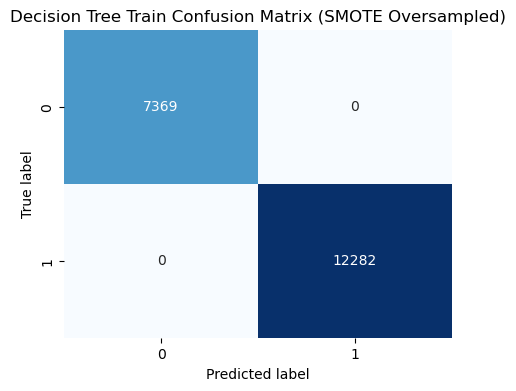

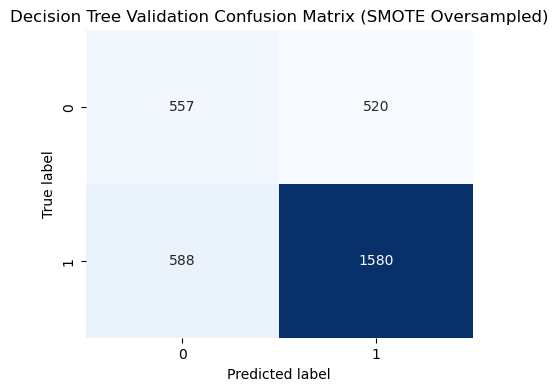

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6586
Train Precision: 1.0000, Validation Precision: 0.7524
Train Recall: 1.0000, Validation Recall: 0.7288



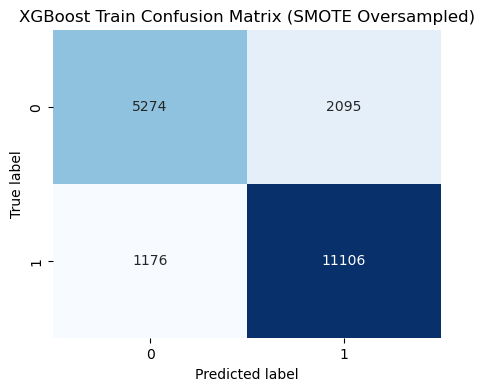

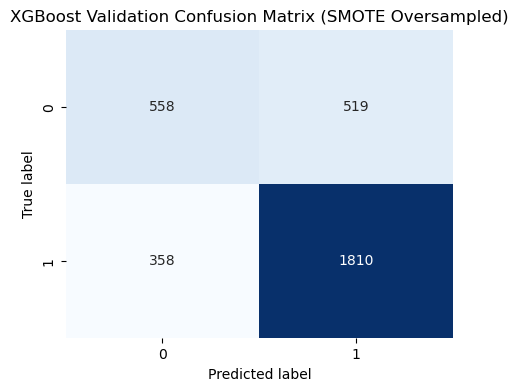

XGBoost - Train Acc: 0.8335, Val Acc: 0.7297
Train Precision: 0.8413, Validation Precision: 0.7772
Train Recall: 0.9043, Validation Recall: 0.8349


--- Undersampled Dataset ---


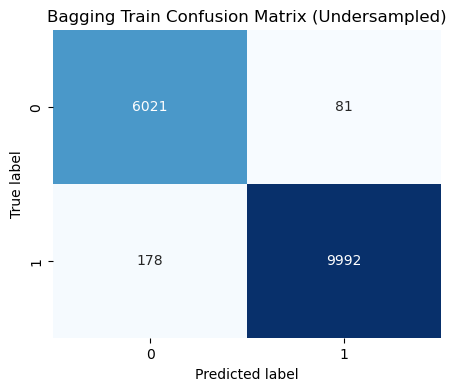

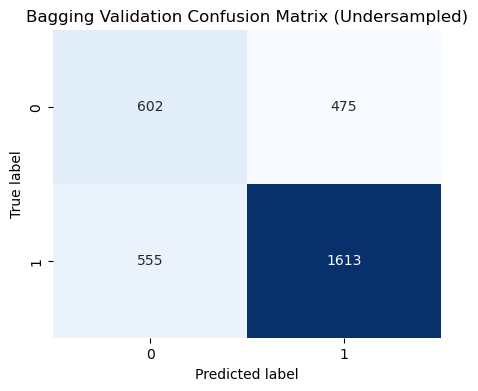

Bagging - Train Acc: 0.9841, Val Acc: 0.6826
Train Precision: 0.9920, Validation Precision: 0.7725
Train Recall: 0.9825, Validation Recall: 0.7440



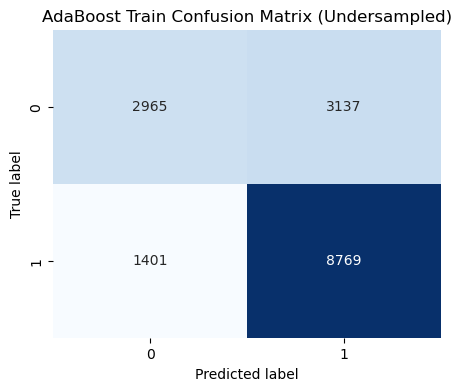

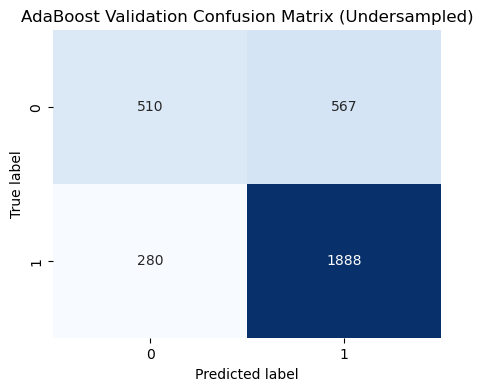

AdaBoost - Train Acc: 0.7211, Val Acc: 0.7390
Train Precision: 0.7365, Validation Precision: 0.7690
Train Recall: 0.8622, Validation Recall: 0.8708



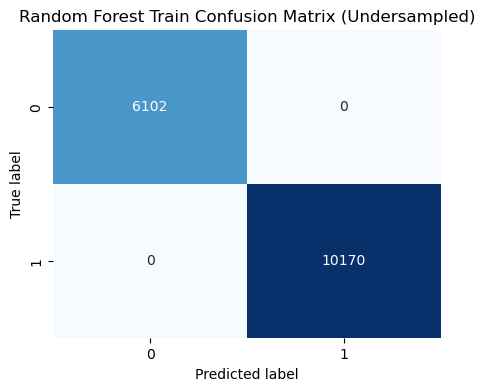

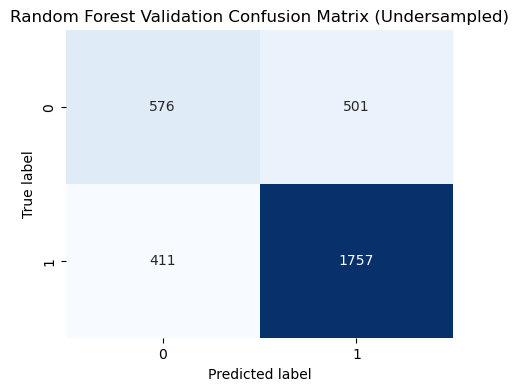

Random Forest - Train Acc: 1.0000, Val Acc: 0.7190
Train Precision: 1.0000, Validation Precision: 0.7781
Train Recall: 1.0000, Validation Recall: 0.8104



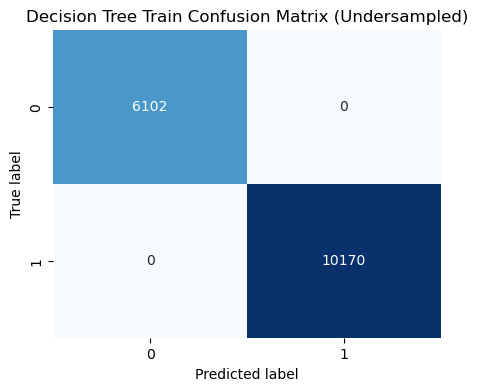

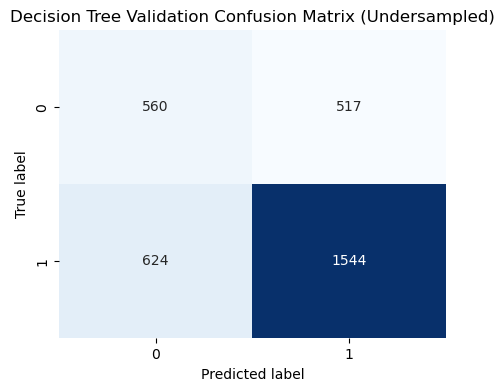

Decision Tree - Train Acc: 1.0000, Val Acc: 0.6484
Train Precision: 1.0000, Validation Precision: 0.7492
Train Recall: 1.0000, Validation Recall: 0.7122



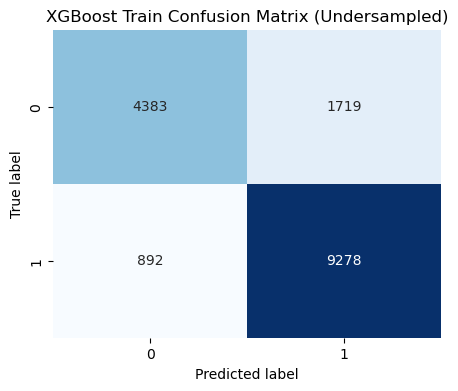

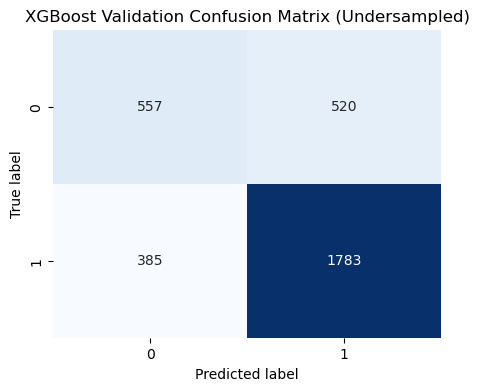

XGBoost - Train Acc: 0.8395, Val Acc: 0.7211
Train Precision: 0.8437, Validation Precision: 0.7742
Train Recall: 0.9123, Validation Recall: 0.8224


=== Summary Table ===
            Model            Dataset  Train Accuracy  Val Accuracy  \
0         Bagging           Original        0.983409      0.695532   
1        AdaBoost           Original        0.734497      0.733436   
2   Random Forest           Original        1.000000      0.730971   
3   Decision Tree           Original        1.000000      0.665023   
4         XGBoost           Original        0.841656      0.734052   
5         Bagging  SMOTE Oversampled        0.983309      0.690601   
6        AdaBoost  SMOTE Oversampled        0.719709      0.736826   
7   Random Forest  SMOTE Oversampled        0.999949      0.726965   
8   Decision Tree  SMOTE Oversampled        1.000000      0.658552   
9         XGBoost  SMOTE Oversampled        0.833545      0.729738   
10        Bagging       Undersampled        0.984083      0

,Model,Dataset,Train Accuracy,Val Accuracy,Train Precision,Val Precision,Train Recall,Val Recall
0,Bagging,Original,0.983409,0.695532,0.990820,0.775444,0.984286,0.766144
1,AdaBoost,Original,0.734497,0.733436,0.760948,0.755992,0.878603,0.887454
2,Random Forest,Original,1.000000,0.730971,1.000000,0.770581,1.000000,0.850554
3,Decision Tree,Original,1.000000,0.665023,1.000000,0.751747,1.000000,0.744465
4,XGBoost,Original,0.841656,0.734052,0.848390,0.769963,0.929002,0.858395
5,Bagging,SMOTE Oversampled,0.983309,0.690601,0.991287,0.780347,0.981925,0.747232
6,AdaBoost,SMOTE Oversampled,0.719709,0.736826,0.733586,0.765777,0.866064,0.873155
7,Random Forest,SMOTE Oversampled,0.999949,0.726965,0.999919,0.778696,1.000000,0.826107
8,Decision Tree,SMOTE Oversampled,1.000000,0.658552,1.000000,0.752381,1.000000,0.728782
9,XGBoost,SMOTE Oversampled,0.833545,0.729738,0.841300,0.777158,0.904250,0.834871


In [154]:
models = {
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

evaluate_and_summarize(models, X_train, y_train, X_val, y_val)


## Observation
- Accuracy and Precision will be our evaluation metric
- Bagging classifier suffers from the problem of overfitting because training set accuracy is 98% and validation accuracy is 69%, the precision falls from 99% to 77.54% so this model does not generalize well
- AdaBoost classifier generalizes well. There is no issue of overfitting. For validation dataset, Precision is 75.60 and accuracy is 73.34%
- Random Forest classifier has a problem of overfitting. For validation dataset, Precision = 77% and Accuracy=73%. In training dataset, Precision, Recall and Accuracy all are 100%
- Decision tree classifier has a problem of overfitting. For val dataset, Precision = 75% and Accuracy =66%. In training dataset, Precision, Recall and acc all are 100%
- XGBClassifier has a mild case of overfitting so it is showing some generalization. Precision =77% and Accuracy=73%. In training dataset, Precision and Accuracy is around 84%

Oversampling
- Bagging classifier is overfitting because training set accuracy is 98% and precision is 99% while validation accuracy is 69% and precision is 78% so this model does not generalize well
- AdaBoost classifier generalizes very well. There is no issue of overfitting. It is a special case where Accuracy and Precision in val dataset is greater than Precision and Accuracy in training dataset. For Val dataset, acc=78% and Precision =76%
- Random Forest classifier has a problem of overfitting. For val dataset, Precision = 77% and Accuracy=72%.
- Decision tree classifier has a very big problem of overfitting. For val dataset, Precision = 75% and Accuracy=65%.
- XGBClassifier shows little generalization. Precision =77% and Accuracy=72%.


Undersampling
- Bagging classifier is overfitting because training set accuracy is 98% and precision is 99% while validation accuracy is 68% and precision is 77% so this model does not generalize well
- AdaBoost classifier generalizes very well. There is no issue of overfitting. It is a special case where acc and Precision in val dataset is greater than Precision and Acc in training dataset. For Val dataset, Accuracy=73% and Precision=76%
- Random Forest classifier has a problem of overfitting. For val dataset, Precision = 77% and Accuracy=72%.
- Decision tree classifier has a very big problem of overfitting. For val dataset, Precision = 75% and Accuracy=65%.
- XGBClassifier shows little generalization. Precision=77% and Accuracy=72%.






# Reasons for choosing the following models 
1)AdaBoost Classifier
### Why choose AdaBoost:
 1)	Consistently good validation accuracy (70-73%) and precision (75-77%) across all datasets.
 2)	Shows excellent generalization with minimal overfitting; training and validation performances are closely matched.
 3)	Adaptively focuses on harder-to-classify cases, improving robustness.
### 2. XGBoost Classifier
Why choose XGBoost:
1) 	High validation precision (up to 79%) on oversampled and undersampled datasets, indicating reliable positive class   identification.
2) Good validation accuracy (~72-73%) combined with better generalization than bagging and random forest.
3) Powerful gradient boosting framework capable of capturing complex patterns without severe overfitting with proper regularization.
### 3. Random Forest Classifier (with caution)
Why choose Random Forest:
	•	Despite some overfitting, still achieves relatively high validation accuracy (~71-73%) and precision (77-78%).
	•	Can be a strong baseline and a good candidate for further tuning or regularization to reduce overfitting.
	•	Ensemble learning helps reduce variance compared to decision trees.

# Hyperparameter tuning, plotting ROC, AUC curve and calculating the optimal threshold

Starting hyperparameter tuning per best dataset per model...
Tuning AdaBoost on oversample data...
AdaBoost best params: {'learning_rate': 0.1, 'n_estimators': 200}, best CV accuracy: 0.7096

Tuning XGBoost on undersample data...
XGBoost best params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}, best CV accuracy: 0.7175

Tuning Random Forest on original data...
Random Forest best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}, best CV accuracy: 0.7448



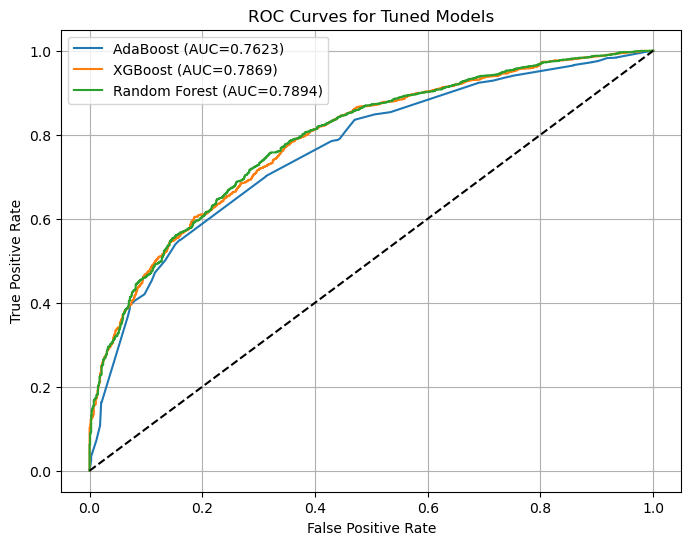

AdaBoost: Best threshold = 0.506 with accuracy = 0.7341
XGBoost: Best threshold = 0.475 with accuracy = 0.7532
Random Forest: Best threshold = 0.529 with accuracy = 0.7504
AdaBoost - Val Acc: 0.7341, Prec: 0.7816, Rec: 0.8353
XGBoost - Val Acc: 0.7532, Prec: 0.7863, Rec: 0.8658
Random Forest - Val Acc: 0.7504, Prec: 0.7820, Rec: 0.8685

Selected best model: XGBoost with combined score: 2.4053

Test set evaluation for XGBoost at threshold 0.475:
Accuracy: 0.7441
Precision: 0.7775
Recall: 0.8644
Confusion Matrix:
[[ 636  631]
 [ 346 2205]]


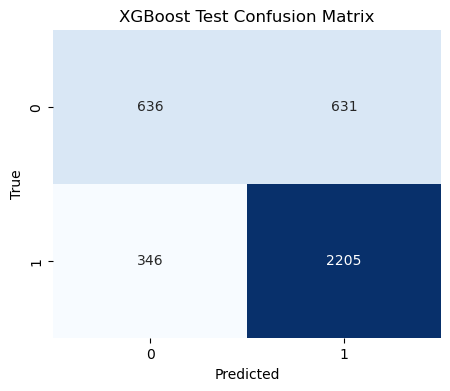

In [155]:
# the best_three_models & param_grids are defined as below
best_three_models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

param_grids_best_three = {
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1], 'subsample': [0.7, 1.0]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
}

sampling_method_for_model = {
    'AdaBoost': 'oversample',
    'XGBoost': 'undersample',
    'Random Forest': 'original'
}

# Function to prepare sampled training data
def prepare_sampling(X_tr, y_tr, sampling_method, ratio=0.7):
    if sampling_method == 'oversample':
        sampler = SMOTE(sampling_strategy=ratio, random_state=42)
        return sampler.fit_resample(X_tr, y_tr)
    elif sampling_method == 'undersample':
        sampler = RandomUnderSampler(sampling_strategy=ratio, random_state=42)
        return sampler.fit_resample(X_tr, y_tr)
    else:  # "original" or no sampling
        return X_tr, y_tr

# Prepare sampled training datasets per model
sampled_train_data = {}
for model_name in best_three_models.keys():
    method = sampling_method_for_model.get(model_name, 'original')
    X_t, y_t = prepare_sampling(X_train, y_train, method)
    sampled_train_data[model_name] = (X_t, y_t)

# Tune hyperparameters for each model on its corresponding sampled data
tuned_estimators = {}
print("Starting hyperparameter tuning per best dataset per model...")
for name, model in best_three_models.items():
    print(f"Tuning {name} on {sampling_method_for_model[name]} data...")
    X_tune, y_tune = sampled_train_data[name]
    grid = GridSearchCV(model, param_grids_best_three[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_tune, y_tune)
    tuned_estimators[name] = grid.best_estimator_ # dict of trained model on best hyper parameter
    print(f"{name} best params: {grid.best_params_}, best CV accuracy: {grid.best_score_:.4f}\n")

# Plot ROC AUC curves for tuned models on validation data
plt.figure(figsize=(8,6))
for name, model in tuned_estimators.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curves for Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Find best thresholds per model on validation data
best_thresholds = {}
for name, model in tuned_estimators.items():
    y_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    accuracies = [accuracy_score(y_val, (y_proba >= t).astype(int)) for t in thresholds]
    best_thresh = thresholds[np.argmax(accuracies)]
    best_thresholds[name] = best_thresh
    print(f'{name}: Best threshold = {best_thresh:.3f} with accuracy = {max(accuracies):.4f}')

# Select best model by validation accuracy+precision+recall with best threshold
validation_scores = {}
for name, model in tuned_estimators.items():
    y_proba = model.predict_proba(X_val)[:,1]
    threshold = best_thresholds[name]
    y_pred = (y_proba >= threshold).astype(int)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    validation_scores[name] = acc + prec + rec
    print(f"{name} - Val Acc: {acc:.4f}, Prec: {prec:.4f}, Rec: {rec:.4f}")

best_model_name = max(validation_scores, key=validation_scores.get)
best_model = tuned_estimators[best_model_name]
best_thresh = best_thresholds[best_model_name]
print(f"\nSelected best model: {best_model_name} with combined score: {validation_scores[best_model_name]:.4f}")

# Evaluate best model on test data using best threshold
y_proba_test = best_model.predict_proba(X_test)[:,1]
y_pred_test = (y_proba_test >= best_thresh).astype(int)

test_acc = accuracy_score(y_test, y_pred_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)

print(f"\nTest set evaluation for {best_model_name} at threshold {best_thresh:.3f}:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall: {test_rec:.4f}")
print(f"Confusion Matrix:\n{test_cm}")

plt.figure(figsize=(5,4))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'{best_model_name} Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Conclusions and Recommendations

## Conclusions
1. Most applicants are from Asia, followed by Europe and North America.
2. Majority hold a Bachelor’s or Master’s degree.
3. Most applicants have prior work experience and do not require job training.
4. Visa applications are predominantly for full-time positions.
5. Most employers were established near the 2000s and have small–medium workforce sizes.
6. Majority of records fall under Certified status.
7. Wage data is right-skewed, with most applicants earning lower annual wages but certified applicants generally earning more.
8. Companies with greater age / establishment history and larger workforce show better approval trends.

These observations suggest that the U.S. workforce demand is primarily fulfilled by skilled and experienced foreign workers, especially from Asia.

On evaluation of Bagging, AdaBoost, Random Forest, Decision Tree, and XGBoost — under original, SMOTE oversampled, and undersampled conditions.

Key takeaway:

- XGBoost consistently provides the best balance on validation:
- Validation Accuracy: ~75
- Validation Precision: ~78
- Validation Recall: ~86
  

This makes XGBoost the strongest model to:
- Reduce false approvals (important for OFLC)
- Reduce false denials (important for applicants)

Bagging and Random Forest show strong training performance but are overfitting, especially with 100% train accuracy.

Final Model Chosen: XGBoost
Key takeaway:

- XGBoost consistently provides the best balance on Test:
- Accuracy: 0.7441
- Precision:0.7775
- Recall: 0.8644 

   

## Recommendations:

1. Use ML to Speed Up Visa Application Screening
Implement the trained XGBoost model as a first-level filter to:
Automatically approve applications with high likelihood of certification

Flag doubtful applications for secondary manual review
- Reduces processing bottlenecks and operational costs.
- Prioritize Skilled Workforce Selection

2. Encourage employers to hire and sponsor high-skill, high-wage foreign talent to meet U.S. labor market needs efficiently.

3. Employer Credibility Verification

- Companies with longer establishment history and larger employee base show better approval success.
- For new/small firms, provide a compliance support program:

4. Enhance the Application Form
-Request structured fields to improve decision accuracy:
- Exact experience years rather than Yes/No
